In [1]:
#!/usr/bin/env conda run -n newenv1 python
import sys
print(sys.executable)

C:\ProgramData\Anaconda3_1\envs\newenv1\python.exe


In [2]:
import h5py
import pandas as pd
import os
import seaborn as sns

In [3]:
# Standard ML Models for comparison
from sklearn.linear_model           import LinearRegression
from sklearn.linear_model           import ElasticNet
from sklearn.ensemble               import RandomForestRegressor
from sklearn.ensemble               import ExtraTreesRegressor
from sklearn.ensemble               import GradientBoostingRegressor
from sklearn.svm                    import SVR

from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn.tree                   import DecisionTreeClassifier
from sklearn.neighbors              import KNeighborsClassifier
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.naive_bayes            import GaussianNB
from sklearn.svm                    import SVC
from sklearn.ensemble               import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [493]:
#KMeans classifier

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [4]:
# These are for running the model and conducting model diagnostics
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
import researchpy as rp

In [5]:
path = os.getcwd()

files=[]
filespath = []

for r,d,f in os.walk(path):
    for file in f:
        if '.h5' in file:
            files.append(file)
            filespath.append(os.path.join(r,file))

In [6]:
import scipy.stats as st
import statsmodels as sm

import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib
import plotly.graph_objects as go
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import numpy as  np

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
#matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=10, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy]
    
    # Distributions reduced to best known
    DISTRIBUTIONS = [    
        st.uniform, st.norm, st.halfnorm, st.gamma, st.expon, st.triang, st.lognorm, st.t
    ]
    
    # Distributions available in pymc3
#     DISTRIBUTIONS = [st.norm]


    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    pass

                except Exception as ex:
                    
                    template = "An exception of type {0} occurred. Arguments:\n{1!r}"
                    message = template.format(type(ex).__name__, ex.args)
                    print(message)
                    
                    pass



                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse


        except Exception as ex:
            
            template = "An exception of type {0} occurred. Arguments:\n{1!r}"
            message = template.format(type(ex).__name__, ex.args)
            print(message)
            
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

####  set colori di stampa

In [7]:
dict_col = {0:'DodgerBlue',1:'Tomato',2:'Fuchsia',3:'DarkKhaki',4:'Orange'}
dict_col_pale = {0:'LightBlue',1:'LightPink',2:'Lavender',3:'Khaki',4:'Moccasin'}
dict_type = {1:'Basalt',2:'Nontronite',3:'Pyroclastic'}

### INIZIO 

In [8]:
df = pd.read_excel('all.xlsx')

In [9]:
df.columns

Index(['name', 'dry_weight', 'water_cont', 'void_ratio', 'degree_sat', 'UCS',
       'elastic_mod', 'poisson', 'data8', 'diameter', 'force', 'data11',
       'type', 'depth', 'Unnamed: 14', 'Tunnel', 'Chainage', 'pyr',
       'Vh from bottom', 'Rs', 'RQD', 'spacing', 'RMR',
       'Descr Mapping/Borehole', 'RQD.1', 'rock_type', 'pred_class_i',
       'pred_class_w', 'pred_class_f', 'name_file', 'note', 'ID-num'],
      dtype='object')

In [10]:
list_numeric_cols = df[['dry_weight', 'water_cont', 'void_ratio', 'degree_sat', 'UCS',
       'elastic_mod', 'poisson', 'type', 'depth']].columns
list_numeric_cols

Index(['dry_weight', 'water_cont', 'void_ratio', 'degree_sat', 'UCS',
       'elastic_mod', 'poisson', 'type', 'depth'],
      dtype='object')

In [12]:
# make sure data is numeric and not string
df[list_numeric_cols]=df[list_numeric_cols].apply(pd.to_numeric,errors='coerce')

In [13]:
df.describe().to_excel('TABOUT/describe_initial_data.xlsx') # per report

In [14]:
df1 = df.loc[:,['dry_weight', 'water_cont', 'UCS', 'elastic_mod', 'type']].dropna()
df1.columns

Index(['dry_weight', 'water_cont', 'UCS', 'elastic_mod', 'type'], dtype='object')

start dry_weight
Distribution found: triang


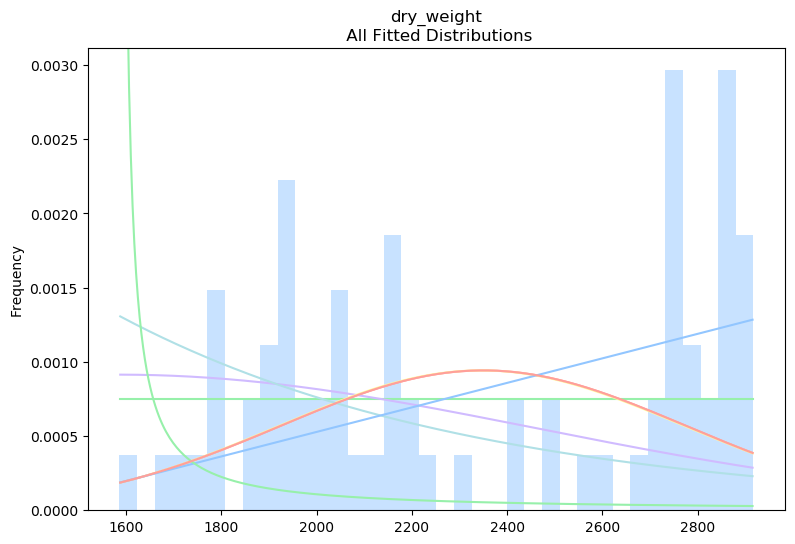

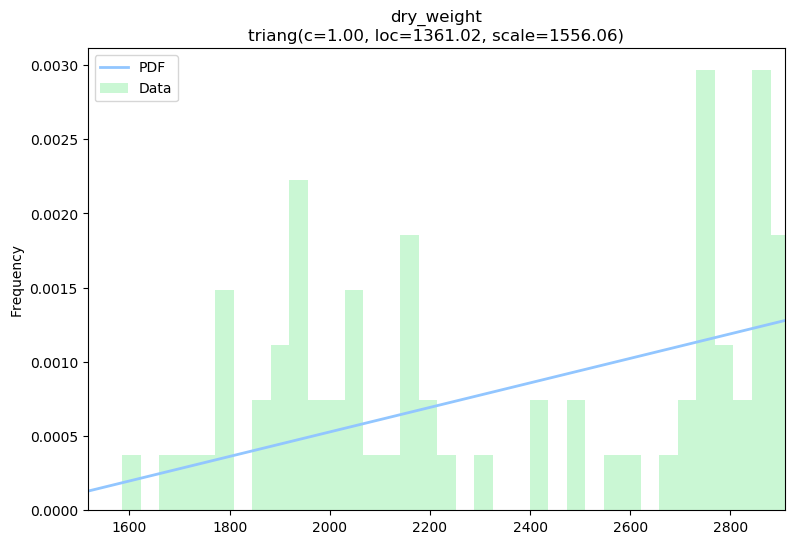

start water_cont
Distribution found: lognorm


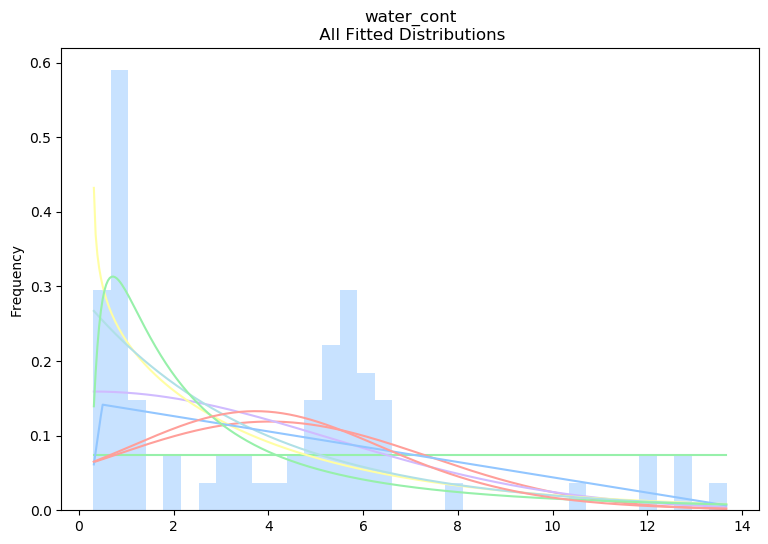

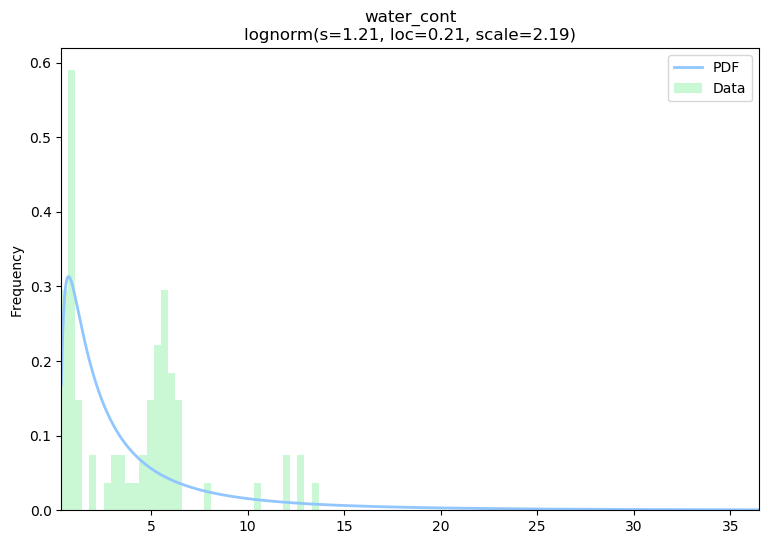

start UCS
Distribution found: lognorm


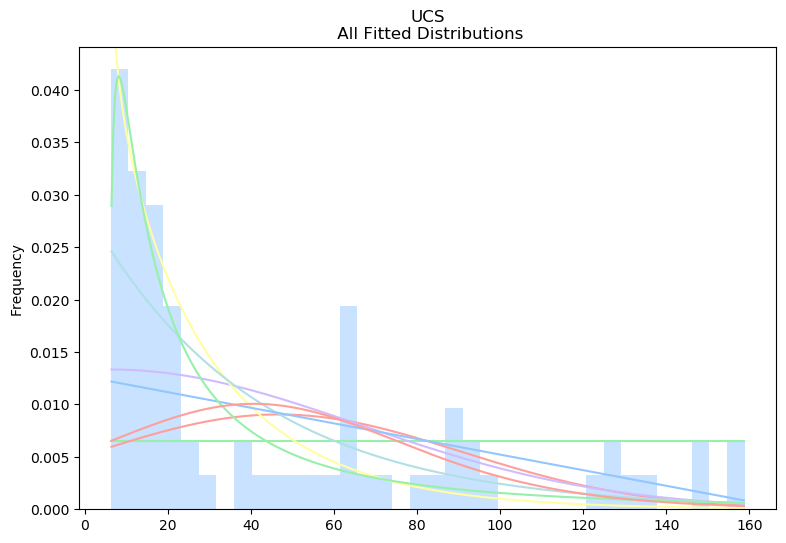

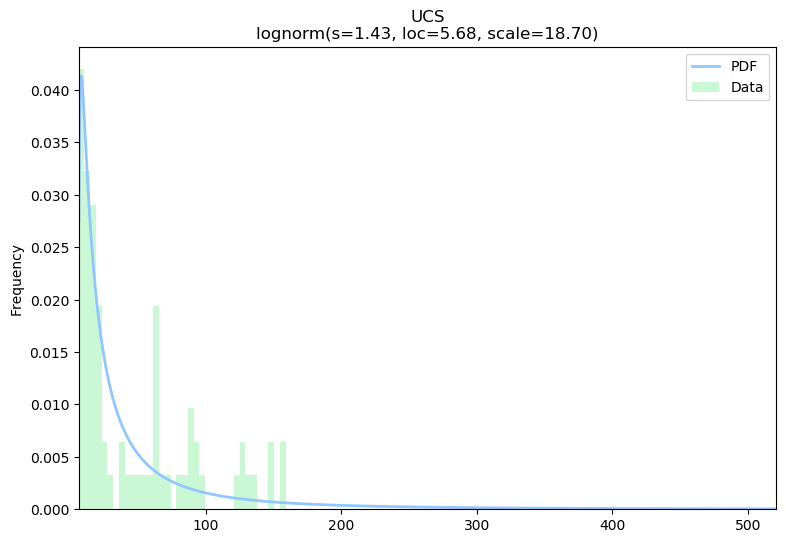

start elastic_mod
Distribution found: gamma


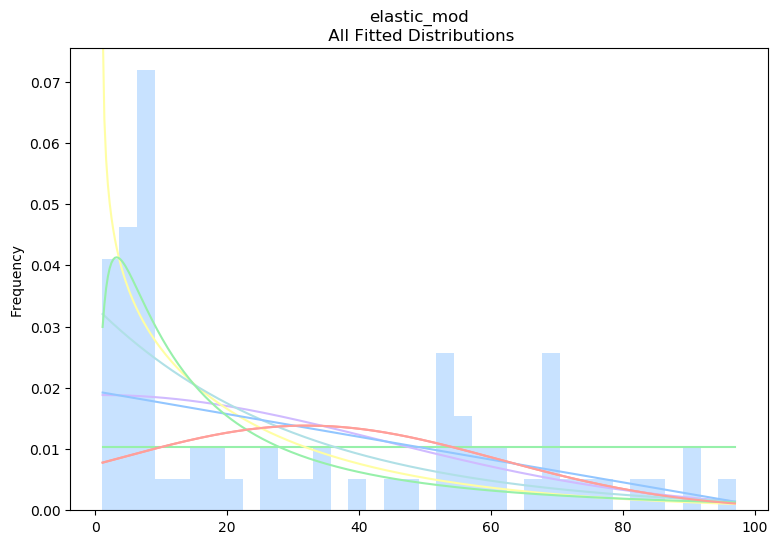

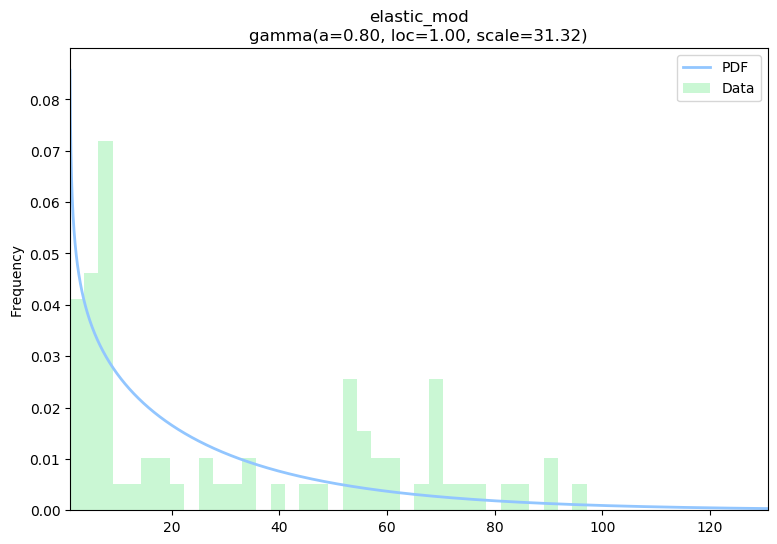

In [15]:
# MUST define dfg remove int or str columns
# Create statistics: all data togheter

dfg = df1.copy()
if 'name' in dfg.columns: dfg = dfg.drop(columns='name').copy()
if 'type' in dfg.columns: dfg = dfg.drop(columns='type').copy()
if 'pred_class' in dfg.columns: dfg = dfg.drop(columns='pred_class').copy()

# Load data from statsmodels datasets

matplotlib.rcParams.update(matplotlib.rcParamsDefault)

with plt.style.context(("seaborn-pastel",)):

    n_cols = dfg.shape[1]

    par_dict={}

    for e in np.arange(0,n_cols,1):

        print('start '+str(dfg.iloc[:,e].name))

        data = dfg.iloc[:,e].dropna().reset_index(drop=True).copy()
        data = pd.Series(data.values.ravel())

        bins = int(len(data)/2)

        y, x = np.histogram(data, bins=bins, density=True)
        x = (x + np.roll(x, -1))[:-1] / 2.0


        # Plot for comparison
        plt.figure(figsize=(9,6))
        ax = data.plot(kind='hist', bins=bins, density=True, alpha=0.5)
        # Save plot limits
        dataYLim = ax.get_ylim()
        dataXLim = ax.get_xlim()

        # Find best fit distribution
        best_fit_name, best_fit_params = best_fit_distribution(data, bins*10, ax)
        best_dist = getattr(st, best_fit_name)

        print('Distribution found: '+str(best_fit_name))

        # Update plots
        
        ax.set_ylim(dataYLim)
        ax.set_xlim(dataXLim)
        
        #ax.set_xlim(ax.get_xlim()[0]*1.2,ax.get_xlim()[1]*1.2)
        #ax.set_ylim(ax.get_ylim()[0]*1.2,ax.get_ylim()[1]*1.2)
        
        ax.set_title(dfg.columns[e] + u'\n All Fitted Distributions')
        ax.set_xlabel('')
        ax.set_ylabel('Frequency')
        
        plt.show()

        # Make PDF with best params 
        pdf = make_pdf(best_dist, best_fit_params)

        # Display
        plt.figure(figsize=(9,6))
        ax = pdf.plot(lw=2, label='PDF', legend=True)
        data.plot(kind='hist', bins=bins, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

        param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
        param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
        dist_str = '{}({})'.format(best_fit_name, param_str)

        # export a list  "par_list" with all results

        dict
        par_list = ([(k,v) for k,v in zip(param_names, best_fit_params)])
        par_dict[dfg.columns[e] + '_'+best_fit_name] = par_list

        ax.set_title(dfg.columns[e] + u'\n' + dist_str)
        ax.set_xlabel('')
        ax.set_ylabel('Frequency')
        
        dataYLim = ax.get_ylim()
        dataXLim = ax.get_xlim()
        
        plt.show()

#### GRAFICO UNICO  (NON DIVISI PER TIPO)

start dry_weight
Distribution found: triang


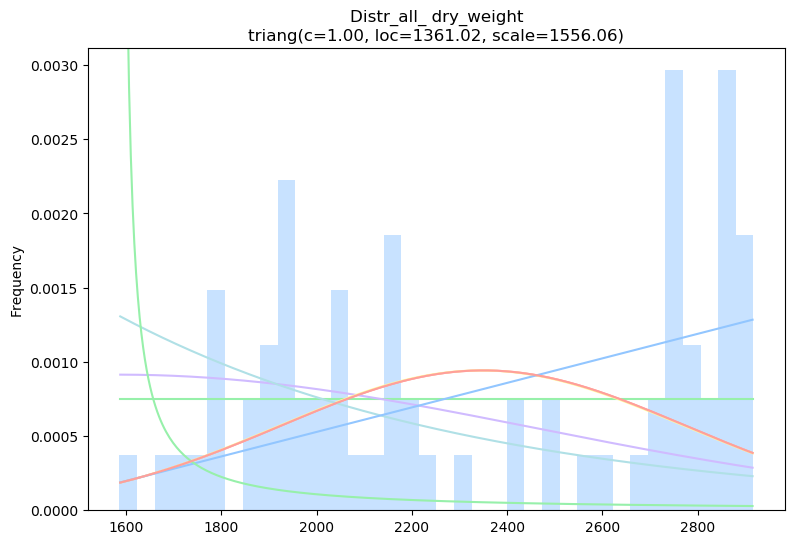

<Figure size 900x600 with 0 Axes>

start water_cont
Distribution found: lognorm


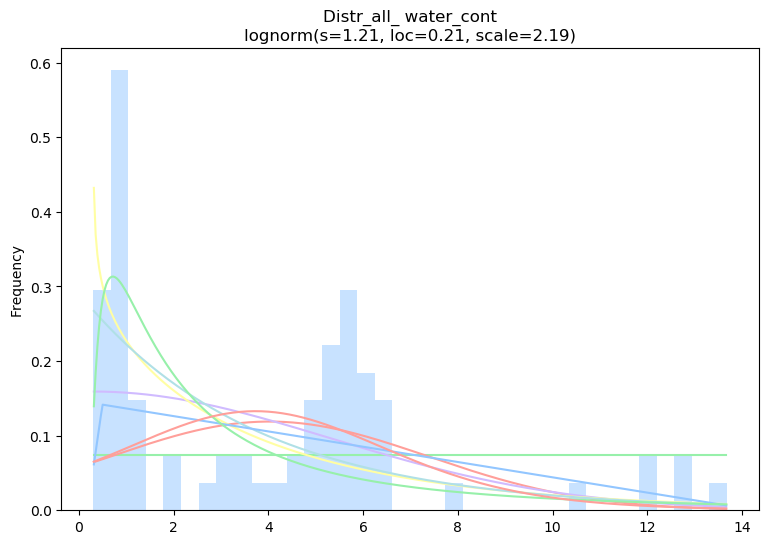

<Figure size 900x600 with 0 Axes>

start UCS
Distribution found: lognorm


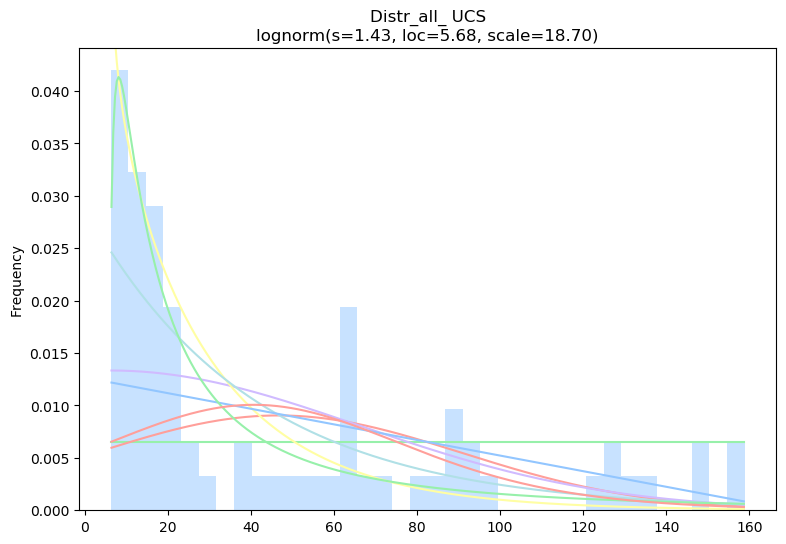

<Figure size 900x600 with 0 Axes>

start elastic_mod
Distribution found: gamma


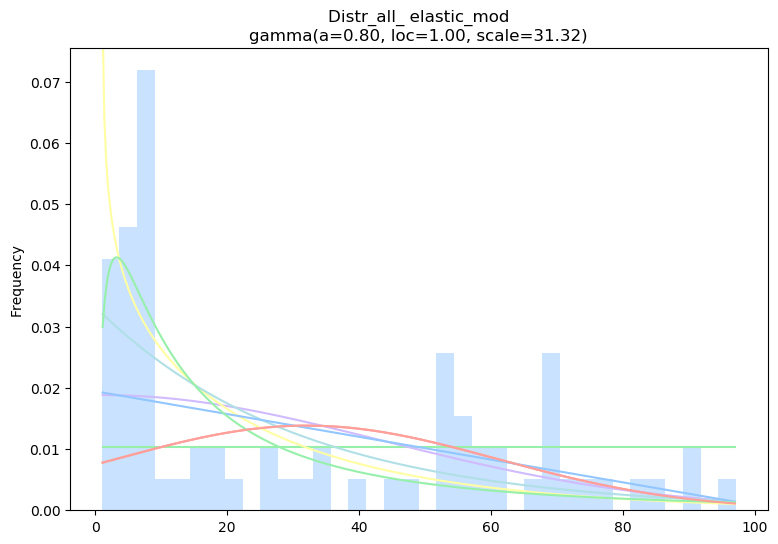

<Figure size 900x600 with 0 Axes>

In [505]:
# MUST define dfg remove int or str columns

dfg = df1[['dry_weight', 'water_cont', 'UCS', 'elastic_mod']].copy()


# Load data from statsmodels datasets    
    
    
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

with plt.style.context(("seaborn-pastel",)):

    n_cols = dfg.shape[1]

    par_dict={}

    for e in np.arange(0,n_cols,1):

        print('start '+str(dfg.iloc[:,e].name))

        data = dfg.iloc[:,e].dropna().reset_index(drop=True).copy()
        data = pd.Series(data.values.ravel())

        bins = int(len(data)/2)
        if bins<10: bins=10

        y, x = np.histogram(data, bins=bins, density=True)
        x = (x + np.roll(x, -1))[:-1] / 2.0  #per ogni bin (x1 + x2)/2 trovo xc centroid


        # Plot for comparison
        plt.figure(figsize=(9,6))
        ax = data.plot(kind='hist', bins=bins, density=True, alpha=0.5)
        # Save plot limits
        dataYLim = ax.get_ylim()
        dataXLim = ax.get_xlim()

        # Find best fit distribution
        best_fit_name, best_fit_params = best_fit_distribution(data, bins*10, ax)
        best_dist = getattr(st, best_fit_name)

        print('Distribution found: '+str(best_fit_name))

        # Update plots
        
        plt.figure(figsize=(9,6))
        ax.set_ylim(dataYLim)
        ax.set_xlim(dataXLim)

#         ax.set_title(dfg.columns[e] + u'\n All Fitted Distributions')
#         ax.set_xlabel('')
#         ax.set_ylabel('Frequency')
#         # Make PDF with best params 
#         pdf = make_pdf(best_dist, best_fit_params)
#         # Display
#         plt.figure(figsize=(12,8))
#         ax = pdf.plot(lw=2, label='PDF', legend=True)
#         data.plot(kind='hist', bins=bins, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

        param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
        param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
        dist_str = '{}({})'.format(best_fit_name, param_str)

        # export a list  "par_list" with all results

        dict
        par_list = ([(k,v) for k,v in zip(param_names, best_fit_params)])
        par_dict[dfg.columns[e] + '_'+best_fit_name] = par_list

        ax.set_title('Distr_all_' +' '+dfg.columns[e] + u'\n' + dist_str)
        ax.set_xlabel('')
        ax.set_ylabel('Frequency')
 
        plt.savefig('PIC//'+ 'Distr_all_' +' '+dfg.columns[e]+'.jpg')
        plt.show()

### PREDICTIVE MODEL FOR MISSING VALUES

In [16]:
# Reinitialize dataframe

df0 = df.loc[:,['name', 'dry_weight', 'water_cont','UCS',
       'elastic_mod', 'poisson','type','rock_type']].copy()
df0.columns

Index(['name', 'dry_weight', 'water_cont', 'UCS', 'elastic_mod', 'poisson',
       'type', 'rock_type'],
      dtype='object')

In [17]:
model1 = LinearRegression()
model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
model3 = RandomForestRegressor(n_estimators=5000)
model4 = ExtraTreesRegressor(n_estimators=50)
model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
model6 = GradientBoostingRegressor(n_estimators=1000)

In [18]:
# must define the varibles to infer values on brackes 
# questa parte è un listato del tipo di variabili di input non serve per il calcolo, ma per definire le variabili della def

X_train   = pd.DataFrame([[1,2,3],[1,2,3],[1,2,3]],index=[1,2,3],columns=[1,2,3])
X_test   = pd.DataFrame([[1,2,3],[1,2,3],[1,2,3]],index=[1,2,3],columns=[1,2,3])
Xcols     = [1,2,3,4]
y_train   = pd.array([1,2,3,4,5])
ycol      = [1,2,3,4]
y_predict = pd.array([1,2,3,4,5])

# start of def
# Inizio a definire i dati di train e di predizione creo una funzione "plt_pred_result"
# Come input di base definisco gli array tipologici sopra 
# Quando lancio la def andro ad inserire ad argomento i dati veri

def plt_pred_result(X_train1= X_train.iloc[:,0], X_test1= X_test.iloc[:,0], Xlabel= Xcols[0], y_train= y_train, ylabel=ycol,  
                    y_predict=y_predict, title = 'Missing data prediction - ',xlog=False,ylog=False):
    
    train_index = X_train1.index
    test_index = X_test1.index
    
    list1 = ['Basalt','Nontronite','Pyroclastics']
    list2 = ['Basalt [Prediction]','Nontronite [Prediction]','Pyroclastics [Prediction]']
    labels = {'dry_weight':'Dry unit weight [kg/m³]', 'water_cont':'Water content [%]', 'UCS':'UCS [MPa]', 'elastic_mod':'Elastic Modulus [GPa]', 'poisson':'Poisson [-]'}
    
    with plt.style.context("seaborn-pastel"):

        df0['colors'] = df0['type'].map(lambda x: dict_col[x])
        df0['colors_pale'] = df0['type'].map(lambda x: dict_col_pale[x])

        fig = plt.figure(figsize=(10,4))
        gs = fig.add_gridspec(12, 12)
        ax1 = fig.add_subplot(gs[:, :9])


        plt.grid(linestyle='--')
        ax1.scatter(X_train1,y_train,c=df0.colors_pale[train_index])
        ax1.scatter(X_test1,y_predict,c=df0.colors[test_index])
        ax1.set_xlabel(labels[Xlabel])
        ax1.set_ylabel(labels[ylabel])
        if xlog: ax1.set_xscale('log')
        if ylog: ax1.set_yscale('log')
        plt.title(title + labels[ylabel], loc="left")


        # Legend creation

        ax2 = fig.add_subplot(gs[:, 9:12])
        ax2.axis('off')

        for gg in np.arange(0,3,1):
            ax2.scatter(2,10-gg,c=dict_col_pale[gg+1])        
            ax2.scatter(2,7-gg,c=dict_col[gg+1])
            ax2.text(3,10-gg,list1[gg])
            ax2.text(3,7-gg,list2[gg])   

        ax2.set_xlim([0,10])
        ax2.set_ylim([0,12])


        plt.show()

        del df0['colors']
        del df0['colors_pale']

### Predict and plot

In [21]:
X_test

dry_weight  type
41        2806     1

[149.312]


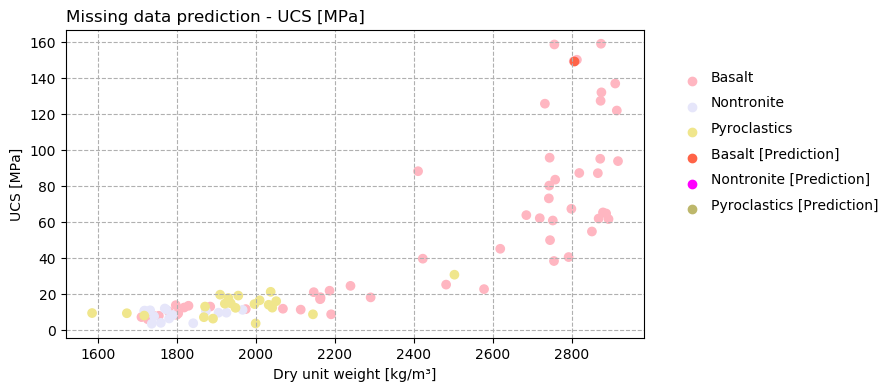

In [19]:
# Xcols sono le colonne di cui ho tutti i dati (in questo caso dry_weight è completo 96su96)
# ycols sono le colonne dove mancano dei dati (in questo caso UCS dove manca un dato 95su96)

Xcols=['dry_weight','type']
ycol='UCS'
allcols = Xcols.copy() # attenzione se non metto copy quindo faccio append lo fa anche in Xcols
allcols.append(ycol)

X_train = df0[allcols].dropna().copy()[Xcols]
y_train = df0[allcols].dropna().copy()[ycol]

# n°index righe nelle quali i dati sono completi (95 su 96)
train_index = X_train.index

# riga sulla quale manca il dato
X_test = df0.drop(index=train_index).copy()[Xcols]

# n°index riga sulla quale manca il dato 
test_index = X_test.index

# Fit the model
# Uso model 4 ExtraTreesRegressor

model4.fit(X=np.array(X_train).reshape(-1,len(Xcols)), y=np.array(y_train))

# Model predict and assign

y_predict = model4.predict(X=X_test)
print(y_predict)

plt_pred_result(X_train.iloc[:,0], X_test.iloc[:,0], Xcols[0], y_train, ycol, y_predict)

In [22]:
# Check the graph above if correct validate this cell
# Inserisco nel main DataFrame il dato predetto
df0.loc[test_index, ycol] = y_predict

#### Predict Water content

[0.8162]


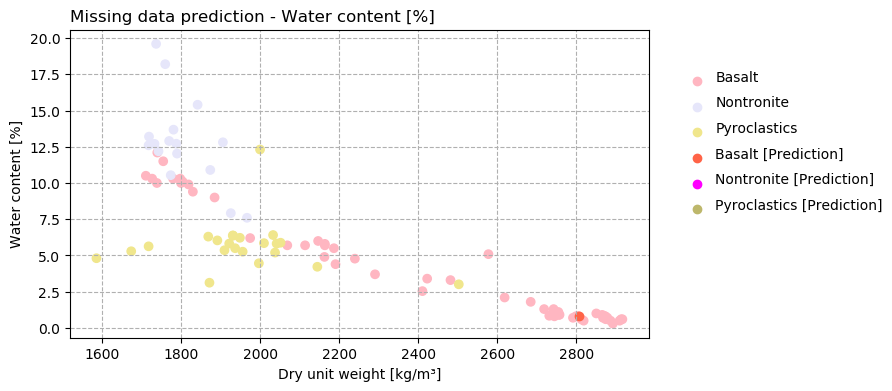

In [511]:
Xcols=['dry_weight','UCS','type']
ycol='water_cont'
allcols = Xcols.copy() # attenzione se non metto copy quindo faccio append lo fa anche in Xcols
allcols.append(ycol)

X_train = df0[allcols].dropna().copy()[Xcols]
y_train = df0[allcols].dropna().copy()[ycol]

train_index = X_train.index

X_test = df0.drop(index=train_index).copy()[Xcols]

test_index = X_test.index

# Fit the model

model4.fit(X=np.array(X_train).reshape(-1,len(Xcols)), y=np.array(y_train))

# Model predict and assign

y_predict = model4.predict(X=X_test)
print(y_predict)

plt_pred_result(X_train.iloc[:,0], X_test.iloc[:,0], Xcols[0], y_train, ycol, y_predict)

In [512]:
# Check the graph above if correct validate this cell
df0.loc[test_index, ycol] = y_predict

#### Elastic modulus prediction

[2.30083427 2.13051531 1.91247126 2.39220624 2.02610212 2.37021766
 1.6287863  1.94333554 1.79781756 2.33934079 1.88399047 1.88283229
 0.79587084 0.6786297  0.74536299 1.69761485 1.74774768 1.69330835
 1.7271971  1.8067269  1.71294991 0.45432968]


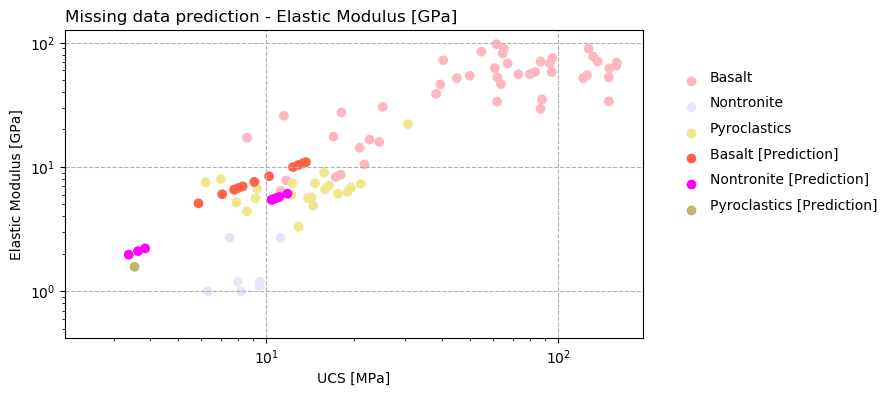

In [513]:
Xcols=['UCS','type']
# Xcols=['UCS']
ycol='elastic_mod'
allcols = Xcols.copy() # attenzione se non metto copy quindo faccio append lo fa anche in Xcols
allcols.append(ycol)

X_train = np.log(df0[allcols].dropna().copy()[Xcols])
y_train = np.log(df0[allcols].dropna().copy()[ycol])

train_index = X_train.index

X_test = np.log(df0.drop(index=train_index).copy()[Xcols])

test_index = X_test.index

# Fit the model

model1.fit(X=np.array(X_train).reshape(-1,len(Xcols)), y=np.array(y_train))

# Model predict and assign

y_predict = model1.predict(X=X_test)
print(y_predict)


plt_pred_result(np.exp(X_train.iloc[:,0]), np.exp(X_test.iloc[:,0]), Xcols[0], np.exp(y_train), ycol, 
                np.exp(y_predict),ylog=True,xlog=True)

#### Elastic modulus with Random Forest

[0.52449701 0.56759748 0.94253412 0.53106816 0.43182157 0.5330986
 0.96664302 0.40613019 0.96911242 0.57125583 0.93802043 0.93302532
 0.69585436 0.69598544 0.12422955 0.27991429 0.78781753 0.7909198
 0.7904676  0.65101933 0.78765847 0.23969612]


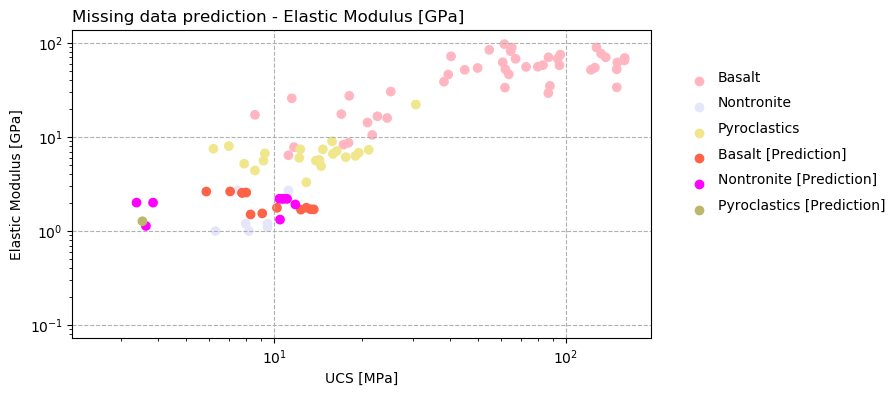

In [514]:
# Model with 4 regressor

Xcols=['UCS','water_cont','dry_weight','type']
# Xcols=['UCS']
ycol='elastic_mod'
allcols = Xcols.copy() # attenzione se non metto copy quindo faccio append lo fa anche in Xcols
allcols.append(ycol)

X_train = np.log(df0[allcols].dropna().copy()[Xcols])
y_train = np.log(df0[allcols].dropna().copy()[ycol])

train_index = X_train.index

X_test = np.log(df0.drop(index=train_index).copy()[Xcols])

test_index = X_test.index

# Fit the model

model3.fit(X=np.array(X_train).reshape(-1,len(Xcols)), y=np.array(y_train))

# Model predict and assign

y_predict = model3.predict(X=X_test)
print(y_predict)


plt_pred_result(np.exp(X_train.iloc[:,0]), np.exp(X_test.iloc[:,0]), Xcols[0], np.exp(y_train), ycol, 
                np.exp(y_predict),ylog=True,xlog=True)

[2.3406669  1.90842404 2.08390051 2.33883743 2.25980725 2.32809183
 2.08041844 2.08744696 2.20345602 2.33010776 2.11831481 2.11831481
 0.2641311  0.2641311  0.2641311  0.86383434 0.88293441 0.83266889
 0.88442068 0.99947166 0.87991763 1.941978  ]


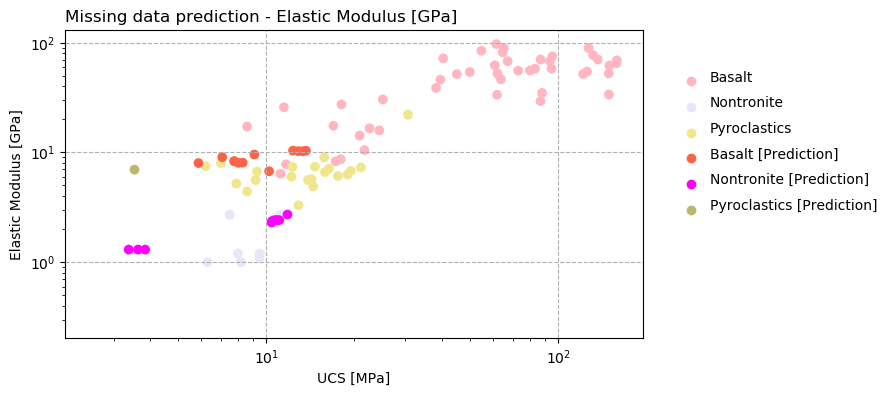

In [515]:
# Model with 2 regressor

Xcols=['UCS','type']
# Xcols=['UCS']
ycol='elastic_mod'
allcols = Xcols.copy() # attenzione se non metto copy quindo faccio append lo fa anche in Xcols
allcols.append(ycol)

X_train = np.log(df0[allcols].dropna().copy()[Xcols])
y_train = np.log(df0[allcols].dropna().copy()[ycol])

train_index = X_train.index

X_test = np.log(df0.drop(index=train_index).copy()[Xcols])

test_index = X_test.index

# Fit the model

model3.fit(X=np.array(X_train).reshape(-1,len(Xcols)), y=np.array(y_train))

# Model predict and assign

y_predict = model3.predict(X=X_test)
print(y_predict)


plt_pred_result(np.exp(X_train.iloc[:,0]), np.exp(X_test.iloc[:,0]), Xcols[0], np.exp(y_train), ycol, 
                np.exp(y_predict),ylog=True,xlog=True)

In [516]:
# Check the graph above if correct validate this cell  # ricordati di esprimere i risultati in np.exp or np.log10 in case
df0.loc[test_index, ycol] = np.exp(y_predict)

In [517]:
df0.drop(index=train_index).to_excel('TABOUT/data_complete_ML.xls')

#### Elastic modulus prediction with Keras

In [518]:
# Export data to csv for analysis in separate notebook

X_train.to_csv('X_keras.csv')
y_train.to_csv('y_keras.csv')
X_test.to_csv('Xt_keras.csv')

C:\ProgramData\Anaconda3_1\envs\newenv1\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.



Import data from Keras analysis

In [519]:
df_keras = pd.read_csv('Xtest_y.csv', index_col=0)

In [520]:
df_keras.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 6 to 94
Data columns (total 5 columns):
dry_weight     22 non-null int64
water_cont     22 non-null float64
UCS            22 non-null float64
type           22 non-null int64
elastic_mod    22 non-null float64
dtypes: float64(3), int64(2)
memory usage: 1.0 KB


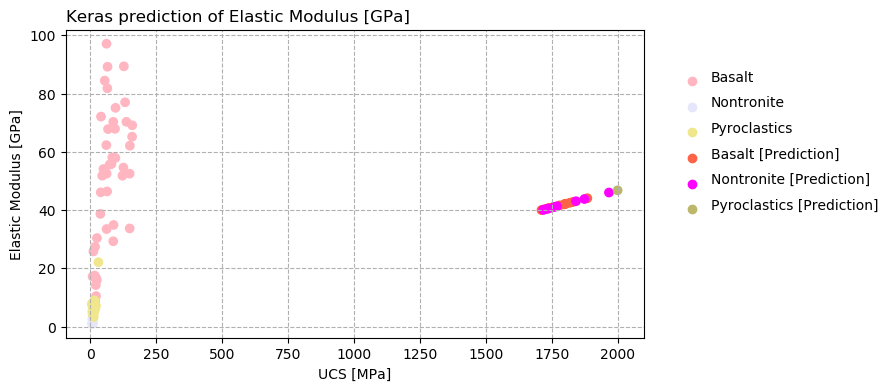

In [521]:
plt_pred_result(np.exp(X_train.iloc[:,0]), df_keras.iloc[:,0], Xcols[0], np.exp(y_train), ycol, df_keras.iloc[:,4],title='Keras prediction of ')

#### Poisson ration prediction

[0.160556 0.192312 0.179282 0.159184 0.161918 0.147654 0.173766 0.162472
 0.18185  0.134882 0.173808 0.176182 0.093654 0.211204 0.105102 0.253724
 0.24349  0.240452 0.208068 0.201284 0.252906 0.24545  0.253882 0.254278
 0.183574]


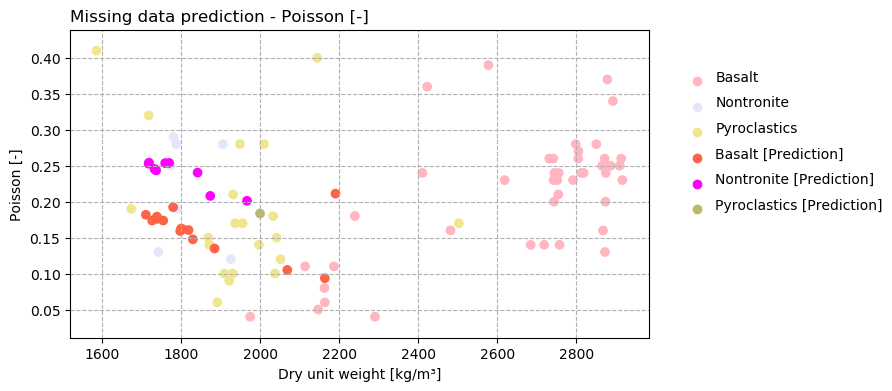

In [522]:
Xcols=['dry_weight','water_cont','UCS','type','elastic_mod']
ycol='poisson'

allcols = Xcols.copy() # attenzione se non metto copy quindo faccio append lo fa anche in Xcols
allcols.append(ycol)

X_train = df0[allcols].dropna().copy()[Xcols]
y_train = df0[allcols].dropna().copy()[ycol]

train_index = X_train.index

X_test = df0.drop(index=train_index).copy()[Xcols]

test_index = X_test.index

# Fit the model

model3.fit(X=np.array(X_train).reshape(-1,len(Xcols)), y=np.array(y_train))

# Model predict and assign

y_predict = model3.predict(X=X_test)
print(y_predict)


plt_pred_result(X_train.iloc[:,0], X_test.iloc[:,0], Xcols[0], y_train, ycol, y_predict)
        

In [523]:
# Check the graph above if correct validate this cell
df0.loc[test_index, ycol] = y_predict

In [524]:
df0.reset_index(inplace=True)  # creo una colonna index che mi serve in futuro per avere la posizione univoca degli elementi

In [525]:
df0.head(3)

index  name  dry_weight  water_cont    UCS  elastic_mod  poisson  type  \
0      0  BS-1        2805        0.83  149.2         52.5     0.26     1   
1      1  BS-2        2732        0.84  125.6         54.6     0.26     1   
2      2  BS-3        2758        0.91   83.4         58.1     0.14     1   

  rock_type  
0      BS-S  
1      BS-S  
2      BS-S

##  KMEANS CLASSIFIER

In [526]:
df2 = df0.copy()
try:
    df2=df2[['dry_weight', 'water_cont', 'UCS', 'elastic_mod', 'type']].copy()
except:
    print('error occurred')

In [527]:
df2_col = df2.columns
df2_index = df2.index
df2_col

Index(['dry_weight', 'water_cont', 'UCS', 'elastic_mod', 'type'], dtype='object')

In [528]:
# normalize columns

x = df2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df2 = pd.DataFrame(x_scaled)
df2.columns = df2_col

In [529]:
df2.UCS *= 7
df2.type *=6
df2.elastic_mod *= 5
df2.dry_weight *= 4

In [530]:
df2.describe()

dry_weight  water_cont        UCS  elastic_mod      type
count   96.000000   96.000000  96.000000    96.000000  96.00000
mean     1.928062    0.283164   1.605970     1.307208   1.87500
std      1.334859    0.239642   1.950697     1.438016   2.50998
min      0.000000    0.000000   0.000000     0.000000   0.00000
25%      0.725019    0.036269   0.300106     0.264048   0.00000
50%      1.385424    0.265803   0.574781     0.432817   0.00000
75%      3.480841    0.498705   2.631752     2.652185   3.00000
max      4.000000    1.000000   7.000000     5.000000   6.00000

In [531]:
# Loading dataset
model = KMeans(n_clusters=5)

model.fit(df2)

all_prediction= model.predict(df2)

# Insert classes into the main df
df1 = df0.loc[df2_index,:].copy()
df1['pred_class']=all_prediction           #insert the class calculated
df1['pred_class'] = df1['pred_class'].astype(str)  # avoid continuous color scale on pred_class

#### RIORDINO IN BASE AL PLOT UCS-ELAST_MOD

In [532]:
clust_cent = model.cluster_centers_     # row for each class
clust_cent

array([[3.53588345, 0.04246452, 2.89525743, 3.07593992, 0.        ],
       [1.10320333, 0.27946302, 0.46663393, 0.31683977, 6.        ],
       [1.2625695 , 0.37859067, 0.46819702, 0.60174148, 0.        ],
       [0.64838467, 0.6482513 , 0.23152167, 0.043723  , 3.        ],
       [3.75597295, 0.02220829, 6.19069702, 3.20317378, 0.        ]])

In [533]:
Rdist = []
for ii in np.arange(0,clust_cent.shape[0],1):
    R = 0   
    for ee in np.arange(2,4,1):   # only for position 2,3 UCS-mod-elast
        R += clust_cent[ii][ee]**2
    Rdist.append(np.sqrt(R))

In [534]:
dfgroups = pd.DataFrame({"R":Rdist}).sort_values('R').reset_index().reset_index()
neworder = []
oldorder = []
neworder = ''.join([str(elem) for elem in dfgroups.iloc[:,0].tolist()])
oldorder = ''.join([str(elem) for elem in dfgroups.iloc[:,1].tolist()])
dict_groups = dict(zip(oldorder,neworder))
dict_groups

{'3': '0', '1': '1', '2': '2', '0': '3', '4': '4'}

In [535]:
df1['pred_class'] = df1['pred_class'].apply(lambda x: dict_groups[x])

### PLOT 

In [536]:
df1['type_str'] = df1.type.map(lambda x: dict_type[x])
df1

index     name  dry_weight  water_cont     UCS  elastic_mod   poisson  \
0       0     BS-1        2805        0.83  149.20    52.500000  0.260000   
1       1     BS-2        2732        0.84  125.60    54.600000  0.260000   
2       2     BS-3        2758        0.91   83.40    58.100000  0.140000   
3       3   BS - 4        2240        4.78   24.40    15.900000  0.180000   
4       4   BS - 5        2578        5.09   22.60    16.600000  0.390000   
..    ...      ...         ...         ...     ...          ...       ...   
91     91    PYR-4        1674        5.29    9.20     5.600000  0.190000   
92     92    PYR-5        1586        4.81    9.30     6.700000  0.410000   
93     93    PYR-6        2145        4.22    8.60     4.400000  0.400000   
94     94  PYR - 7        2000       12.31    3.54     6.972529  0.183574   
95     95  PYR - 9        1869        6.30    7.00     8.000000  0.150000   

    type rock_type pred_class     type_str  
0      1      BS-S          4       Basalt  
1      1      BS-S          4       Basalt  
2      1      BS-S          3       Basalt  
3      1  BS-W-Ves          2       Basalt  
4      1  BS-W-Ves          2       Basalt  
..   ...       ...        ...          ...  
91     3       PYR          1  Pyroclastic  
92     3       PYR          1  Pyroclastic  
93     3       PYR          1  Pyroclastic  
94     3       PYR          1  Pyroclastic  
95     3       PYR          1  Pyroclastic  

[96 rows x 11 columns]

In [537]:
import plotly.express as px
import matplotlib


size=(df1.dry_weight)**2
fig = px.scatter(df1, x="UCS", y="elastic_mod", color=df1.type_str, text='pred_class',
                 size=size, hover_data=['dry_weight','name','rock_type'],opacity=0.5,log_x=True,log_y=True)


x1 = np.linspace(3,200,2000)
y1 = x1*1
y2 = x1*0.5
y3 = x1*0.2
y4 = x1*0.1

fig.add_scatter(x=x1, y=y1, mode="lines", line = dict(color='royalblue', width=1, dash='dash'), name='Mod_R=1000')
fig.add_scatter(x=x1, y=y2, mode="lines", line = dict(color='red', width=1, dash='dash'), name='Mod_R=500')
fig.add_scatter(x=x1, y=y3, mode="lines", line = dict(color='green', width=1, dash='dash'), name='Mod_R=200')
fig.add_scatter(x=x1, y=y4, mode="lines", line = dict(color='grey', width=1, dash='dash'), name='Mod_R=100')


fig.update_layout(title='Elastic modulus - UCS - Classification',
    autosize=False,
    width=1000,
    height=500)


fig.show()

In [538]:
size=df1.UCS-df1.UCS.max()/df1.UCS.max()
y="elastic_mod"
x="UCS"
fig = px.scatter(df1, x=x, y=y, color="pred_class",
                 size=size, hover_data=['UCS','name','rock_type'],opacity=0.5, facet_row="type",log_x=True)


xmin = np.log10(df1[x].min()*0.8)
xmax = np.log10(df1[x].max()*1.2)
ymin = df1[y].min()*0.8
ymax = df1[y].max()*1.2

fig.update_xaxes(range=[xmin,xmax])
fig.update_yaxes(showline=True, linewidth=0.1, range=[ymin,ymax])

fig.update_layout(
    autosize=False,
    width=1000,
    height=1000)


fig.show()

In [539]:
import plotly.express as px
import matplotlib



size=df1.UCS-df1.UCS.max()/df1.UCS.max()
fig = px.scatter(df1, x="dry_weight", y="elastic_mod", color="pred_class",
                 size=size, hover_data=['UCS','type','name'],opacity=0.5)



fig.update_layout(title='Elastic modulus - dry weight - Classification',
    autosize=False,
    width=1000,
    height=500)


fig.show()

In [540]:
import plotly.express as px
import matplotlib



size=(df2.dry_weight)**4
fig = px.scatter(df2, x="UCS", y="elastic_mod", color=all_prediction,opacity=0.5,log_x=True,log_y=True)


x1 = np.linspace(3,200,2000)
y1 = x1*1
y2 = x1*0.5
y3 = x1*0.2
y4 = x1*0.1


fig.add_scatter(x=clust_cent.T[2].tolist(), y=clust_cent.T[3].tolist(), mode='markers', 
                marker_symbol=135, marker_size=20, marker_color=["black","yellow","blue","green","orange"])


fig.update_layout(title='Centri di massa - valori normalizzati',
    autosize=False,
    width=1000,
    height=500)


fig.show()

In [541]:
import plotly.express as px
import matplotlib



size=(df1.dry_weight)**4
fig = px.scatter(df1, x="UCS", y="elastic_mod", color="pred_class",
                 size=size, hover_data=['UCS','name','type','rock_type'],opacity=0.5,log_x=True,log_y=True)


x1 = np.linspace(3,200,2000)
y1 = x1*1
y2 = x1*0.5
y3 = x1*0.2
y4 = x1*0.1

fig.add_scatter(x=x1, y=y1, mode="lines", line = dict(color='royalblue', width=1, dash='dash'), name='Mod_R=1000')
fig.add_scatter(x=x1, y=y2, mode="lines", line = dict(color='red', width=1, dash='dash'), name='Mod_R=500')
fig.add_scatter(x=x1, y=y3, mode="lines", line = dict(color='green', width=1, dash='dash'), name='Mod_R=200')
fig.add_scatter(x=x1, y=y4, mode="lines", line = dict(color='grey', width=1, dash='dash'), name='Mod_R=100')


fig.update_layout(title='Elastic modulus - UCS - Classification',
    autosize=False,
    width=1000,
    height=500)


fig.show()

In [542]:
import plotly.express as px
import matplotlib


size=df1.UCS-df1.UCS.max()/df1.UCS.max()

fig = px.scatter(df1, x="water_cont", y="elastic_mod", color="pred_class",
                 size=size, hover_data=['UCS'],opacity=0.5)


# fig.update_xaxes(range=[0.7,2.3])
fig.update_yaxes(showline=True, linewidth=0.1, range=[-10, 110])


fig.update_layout(title='Elastic modulus - water content - Classification',
    autosize=False,
    width=1000,
    height=500)


fig.show()

#### Esporto il df con la classificazione a 5 gruppi

In [543]:
df1.to_hdf('dati_rocce_classified.h5', key='df1')
df1.to_csv('dati_rocce_classified.csv')

### STATISTICS AND DISTRIBUTIONS

In [544]:
# These are for running the model and conducting model diagnostics
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
import researchpy as rp

In [545]:
stat1 = rp.summary_cont(df1[['dry_weight','water_cont', 'elastic_mod','UCS']])
stat1['CV'] = stat1.SD/stat1.Mean
stat1['CV*'] = stat1.CV*(1+1/4/stat1.N)
stat1

Variable     N         Mean          SD         SE    95% Conf.  \
0   dry_weight  96.0  2227.562500  444.174215  45.333341  2137.564439   
1   water_cont  96.0     5.765065    4.625100   0.472047     4.827932   
2  elastic_mod  96.0    26.124531   27.638661   2.820859    20.524418   
3          UCS  96.0    39.060062   43.338925   4.423260    30.278780   

      Interval        CV       CV*  
0  2317.560561  0.199399  0.199918  
1     6.702197  0.802263  0.804353  
2    31.724645  1.057958  1.060713  
3    47.841345  1.109546  1.112435

### First classification

In [546]:
type = 1
typename = "Basalt"
descr = df1[df1.type==type][['dry_weight','water_cont', 'elastic_mod','UCS']].describe().T
stat = rp.summary_cont(df1[df1.type==type][['dry_weight','water_cont', 'elastic_mod','UCS']])
stat['CV'] = stat.SD/stat.Mean
# stat['CV*'] = stat.CV*(1+1/4/stat.N)
stat['Min'] = np.array(descr['min'])
stat['Max'] = np.array(descr['max'])
stat['Variable'] = ['Dry weight [kg/m³]','Water content [%]','E Young [GPa]','UCS [MPa]']
stat.columns = ['Variable', 'N', 'Mean', 'SD', 'SE', '95% CI inf', '95% CI sup', 'CV', 'Min', 'Max']
stat['Type']=typename
stat = stat[['Type','Variable', 'N', 'Mean', 'SD', 'SE', '95% CI inf', '95% CI sup', 'CV', 'Min', 'Max']].round(2)
stat_type1 = stat.copy()

In [547]:
type = 2
typename = "Nontronite"
descr = df1[df1.type==type][['dry_weight','water_cont', 'elastic_mod','UCS']].describe().T
stat = rp.summary_cont(df1[df1.type==type][['dry_weight','water_cont', 'elastic_mod','UCS']])
stat['CV'] = stat.SD/stat.Mean
# stat['CV*'] = stat.CV*(1+1/4/stat.N)
stat['Min'] = np.array(descr['min'])
stat['Max'] = np.array(descr['max'])
stat['Variable'] = ['Dry weight [kg/m³]','Water content [%]','E Young [GPa]','UCS [MPa]']
stat.columns = ['Variable', 'N', 'Mean', 'SD', 'SE', '95% CI inf', '95% CI sup', 'CV', 'Min', 'Max']
stat['Type']=typename
stat = stat[['Type','Variable', 'N', 'Mean', 'SD', 'SE', '95% CI inf', '95% CI sup', 'CV', 'Min', 'Max']].round(2)
stat_type2 = stat.copy()

In [548]:
type = 3
typename = "Pyroclastic"
descr = df1[df1.type==type][['dry_weight','water_cont', 'elastic_mod','UCS']].describe().T
stat = rp.summary_cont(df1[df1.type==type][['dry_weight','water_cont', 'elastic_mod','UCS']])
stat['CV'] = stat.SD/stat.Mean
# stat['CV*'] = stat.CV*(1+1/4/stat.N)
stat['Min'] = np.array(descr['min'])
stat['Max'] = np.array(descr['max'])
stat['Variable'] = ['Dry weight [kg/m³]','Water content [%]','E Young [GPa]','UCS [MPa]']
stat.columns = ['Variable', 'N', 'Mean', 'SD', 'SE', '95% CI inf', '95% CI sup', 'CV', 'Min', 'Max']
stat['Type']=typename
stat = stat[['Type','Variable', 'N', 'Mean', 'SD', 'SE', '95% CI inf', '95% CI sup', 'CV', 'Min', 'Max']].round(2)
stat_type3 = stat.copy()

In [549]:
stat_type1

Type            Variable     N     Mean      SD     SE  95% CI inf  \
0  Basalt  Dry weight [kg/m³]  58.0  2449.14  430.80  56.57     2335.87   
1  Basalt   Water content [%]  58.0     3.85    3.78   0.50        2.85   
2  Basalt       E Young [GPa]  58.0    40.04   27.67   3.63       32.77   
3  Basalt           UCS [MPa]  58.0    57.09   47.70   6.26       44.54   

   95% CI sup    CV      Min     Max  
0     2562.41  0.18  1711.00  2917.0  
1        4.84  0.98     0.30    12.1  
2       47.32  0.69     6.40    97.1  
3       69.63  0.84     5.86   158.9

In [550]:
stat_type2

Type            Variable     N     Mean     SD     SE  95% CI inf  \
0  Nontronite  Dry weight [kg/m³]  16.0  1801.75  77.87  19.47     1760.25   
1  Nontronite   Water content [%]  16.0    12.81   3.10   0.77       11.16   
2  Nontronite       E Young [GPa]  16.0     1.84   0.70   0.18        1.47   
3  Nontronite           UCS [MPa]  16.0     8.52   2.86   0.71        7.00   

   95% CI sup    CV      Min      Max  
0     1843.25  0.04  1718.00  1967.00  
1       14.46  0.24     7.60    19.60  
2        2.21  0.38     1.00     2.72  
3       10.05  0.34     3.38    11.83

In [551]:
stat_type3

Type            Variable     N     Mean      SD     SE  95% CI inf  \
0  Pyroclastic  Dry weight [kg/m³]  22.0  1953.09  178.25  38.00     1874.06   
1  Pyroclastic   Water content [%]  22.0     5.69    1.76   0.38        4.91   
2  Pyroclastic       E Young [GPa]  22.0     7.09    3.58   0.76        5.50   
3  Pyroclastic           UCS [MPa]  22.0    13.75    5.95   1.27       11.11   

   95% CI sup    CV      Min      Max  
0     2032.12  0.09  1586.00  2503.00  
1        6.47  0.31     3.01    12.31  
2        8.68  0.51     3.30    22.10  
3       16.39  0.43     3.54    30.60

### Second Classification classification after KMEANS classificator

In [552]:
classe = '0'
descr = df1[df1.pred_class==classe][['dry_weight','water_cont', 'elastic_mod','UCS']].describe().T
stat = rp.summary_cont(df1[df1.pred_class==classe][['dry_weight','water_cont', 'elastic_mod','UCS']])
stat['CV'] = stat.SD/stat.Mean
# stat['CV*'] = stat.CV*(1+1/4/stat.N)
stat['Min'] = np.array(descr['min'])
stat['Max'] = np.array(descr['max'])
stat['Variable'] = ['Dry weight [kg/m³]','Water content [%]','E Young [GPa]','UCS [MPa]']
stat.columns = ['Variable', 'N', 'Mean', 'SD', 'SE', '95% CI inf', '95% CI sup', 'CV', 'Min', 'Max']
stat['Group']=classe
stat = stat[['Group','Variable', 'N', 'Mean', 'SD', 'SE', '95% CI inf', '95% CI sup', 'CV', 'Min', 'Max']].round(2)
stat0 = stat.copy()

In [553]:
classe = '1'
descr = df1[df1.pred_class==classe][['dry_weight','water_cont', 'elastic_mod','UCS']].describe().T
stat = rp.summary_cont(df1[df1.pred_class==classe][['dry_weight','water_cont', 'elastic_mod','UCS']])
stat['CV'] = stat.SD/stat.Mean
# stat['CV*'] = stat.CV*(1+1/4/stat.N)
stat['Min'] = np.array(descr['min'])
stat['Max'] = np.array(descr['max'])
stat['Variable'] = ['Dry weight [kg/m³]','Water content [%]','E Young [GPa]','UCS [MPa]']
stat.columns = ['Variable', 'N', 'Mean', 'SD', 'SE', '95% CI inf', '95% CI sup', 'CV', 'Min', 'Max']
stat['Group']=classe
stat = stat[['Group','Variable', 'N', 'Mean', 'SD', 'SE', '95% CI inf', '95% CI sup', 'CV', 'Min', 'Max']].round(2)
stat1 = stat.copy()

In [554]:
classe = '2'
descr = df1[df1.pred_class==classe][['dry_weight','water_cont', 'elastic_mod','UCS']].describe().T
stat = rp.summary_cont(df1[df1.pred_class==classe][['dry_weight','water_cont', 'elastic_mod','UCS']])
stat['CV'] = stat.SD/stat.Mean
# stat['CV*'] = stat.CV*(1+1/4/stat.N)
stat['Min'] = np.array(descr['min'])
stat['Max'] = np.array(descr['max'])
stat['Variable'] = ['Dry weight [kg/m³]','Water content [%]','E Young [GPa]','UCS [MPa]']
stat.columns = ['Variable', 'N', 'Mean', 'SD', 'SE', '95% CI inf', '95% CI sup', 'CV', 'Min', 'Max']
stat['Group']=classe
stat = stat[['Group','Variable', 'N', 'Mean', 'SD', 'SE', '95% CI inf', '95% CI sup', 'CV', 'Min', 'Max']].round(2)
stat2 = stat.copy()

In [555]:
classe = '3'
descr = df1[df1.pred_class==classe][['dry_weight','water_cont', 'elastic_mod','UCS']].describe().T
stat = rp.summary_cont(df1[df1.pred_class==classe][['dry_weight','water_cont', 'elastic_mod','UCS']])
stat['CV'] = stat.SD/stat.Mean
# stat['CV*'] = stat.CV*(1+1/4/stat.N)
stat['Min'] = np.array(descr['min'])
stat['Max'] = np.array(descr['max'])
stat['Variable'] = ['Dry weight [kg/m³]','Water content [%]','E Young [GPa]','UCS [MPa]']
stat.columns = ['Variable', 'N', 'Mean', 'SD', 'SE', '95% CI inf', '95% CI sup', 'CV', 'Min', 'Max']
stat['Group']=classe
stat = stat[['Group','Variable', 'N', 'Mean', 'SD', 'SE', '95% CI inf', '95% CI sup', 'CV', 'Min', 'Max']].round(2)
stat3 = stat.copy()

In [556]:
classe = '4'
descr = df1[df1.pred_class==classe][['dry_weight','water_cont', 'elastic_mod','UCS']].describe().T
stat = rp.summary_cont(df1[df1.pred_class==classe][['dry_weight','water_cont', 'elastic_mod','UCS']])
stat['CV'] = stat.SD/stat.Mean
# stat['CV*'] = stat.CV*(1+1/4/stat.N)
stat['Min'] = np.array(descr['min'])
stat['Max'] = np.array(descr['max'])
stat['Variable'] = ['Dry weight [kg/m³]','Water content [%]','E Young [GPa]','UCS [MPa]']
stat.columns = ['Variable', 'N', 'Mean', 'SD', 'SE', '95% CI inf', '95% CI sup', 'CV', 'Min', 'Max']
stat['Group']=classe
stat = stat[['Group','Variable', 'N', 'Mean', 'SD', 'SE', '95% CI inf', '95% CI sup', 'CV', 'Min', 'Max']].round(2)
stat4 = stat.copy()

In [557]:
stat0    # Basalt Weak

Group            Variable     N     Mean     SD     SE  95% CI inf  \
0     0  Dry weight [kg/m³]  16.0  1801.75  77.87  19.47     1760.25   
1     0   Water content [%]  16.0    12.81   3.10   0.77       11.16   
2     0       E Young [GPa]  16.0     1.84   0.70   0.18        1.47   
3     0           UCS [MPa]  16.0     8.52   2.86   0.71        7.00   

   95% CI sup    CV      Min      Max  
0     1843.25  0.04  1718.00  1967.00  
1       14.46  0.24     7.60    19.60  
2        2.21  0.38     1.00     2.72  
3       10.05  0.34     3.38    11.83

In [558]:
stat1   # Pyroclastic

Group            Variable     N     Mean      SD     SE  95% CI inf  \
0     1  Dry weight [kg/m³]  22.0  1953.09  178.25  38.00     1874.06   
1     1   Water content [%]  22.0     5.69    1.76   0.38        4.91   
2     1       E Young [GPa]  22.0     7.09    3.58   0.76        5.50   
3     1           UCS [MPa]  22.0    13.75    5.95   1.27       11.11   

   95% CI sup    CV      Min      Max  
0     2032.12  0.09  1586.00  2503.00  
1        6.47  0.31     3.01    12.31  
2        8.68  0.51     3.30    22.10  
3       16.39  0.43     3.54    30.60

In [559]:
stat2   # Basalt Strong +

Group            Variable     N     Mean      SD     SE  95% CI inf  \
0     2  Dry weight [kg/m³]  25.0  2006.12  249.65  49.93     1903.07   
1     2   Water content [%]  25.0     7.61    2.76   0.55        6.47   
2     2       E Young [GPa]  25.0    12.57    6.65   1.33        9.82   
3     2           UCS [MPa]  25.0    13.78    5.83   1.17       11.38   

   95% CI sup    CV      Min     Max  
0     2109.17  0.12  1711.00  2578.0  
1        8.75  0.36     3.30    12.1  
2       15.31  0.53     6.40    30.4  
3       16.19  0.42     5.86    25.1

In [560]:
stat3    # Nontronite

Group            Variable     N     Mean      SD     SE  95% CI inf  \
0     3  Dry weight [kg/m³]  23.0  2762.57  132.45  27.62     2705.29   
1     3   Water content [%]  23.0     1.12    0.72   0.15        0.81   
2     3       E Young [GPa]  23.0    60.12   18.12   3.78       52.29   
3     3           UCS [MPa]  23.0    67.70   18.34   3.82       59.77   

   95% CI sup    CV     Min     Max  
0     2819.84  0.05  2411.0  2917.0  
1        1.43  0.64     0.3     3.4  
2       67.95  0.30    29.3    97.1  
3       75.63  0.27    38.2    95.6

In [561]:
stat4    # Basalt Strong

Group            Variable     N     Mean     SD     SE  95% CI inf  \
0     4  Dry weight [kg/m³]  10.0  2835.80  62.80  19.86     2790.87   
1     4   Water content [%]  10.0     0.73   0.14   0.04        0.63   
2     4       E Young [GPa]  10.0    62.56  15.45   4.89       51.51   
3     4           UCS [MPa]  10.0   140.92  13.91   4.40      130.97   

   95% CI sup    CV     Min      Max  
0     2880.73  0.02  2732.0  2914.00  
1        0.83  0.19     0.5     0.90  
2       73.62  0.25    33.7    89.35  
3      150.87  0.10   121.8   158.90

## Plot distributions

start dry_weight
bins 29
Distribution found: triang


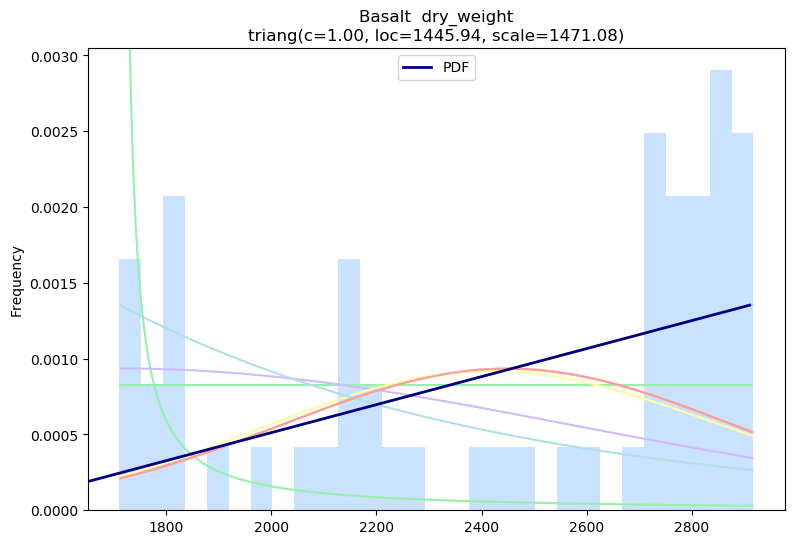

start water_cont
bins 29
Distribution found: t


<Figure size 640x480 with 0 Axes>

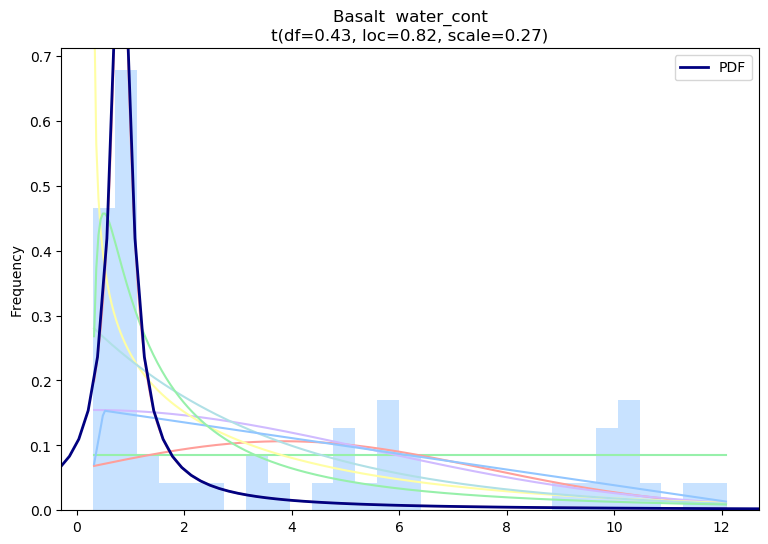

start UCS
bins 29
Distribution found: gamma


<Figure size 640x480 with 0 Axes>

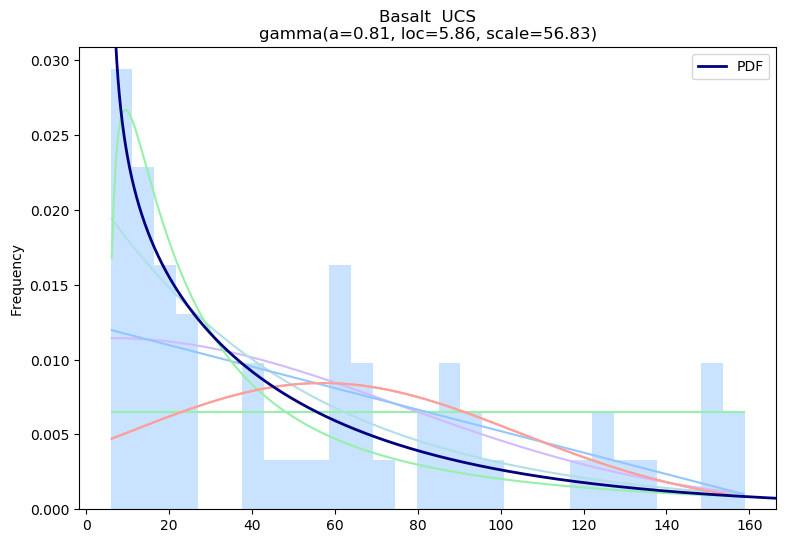

start elastic_mod
bins 29
Distribution found: gamma


<Figure size 640x480 with 0 Axes>

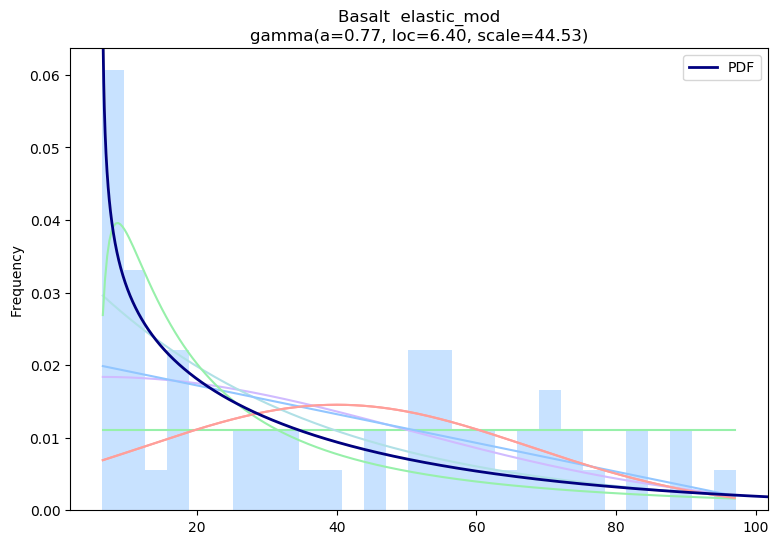

start dry_weight
bins 8
Distribution found: gamma


<Figure size 640x480 with 0 Axes>

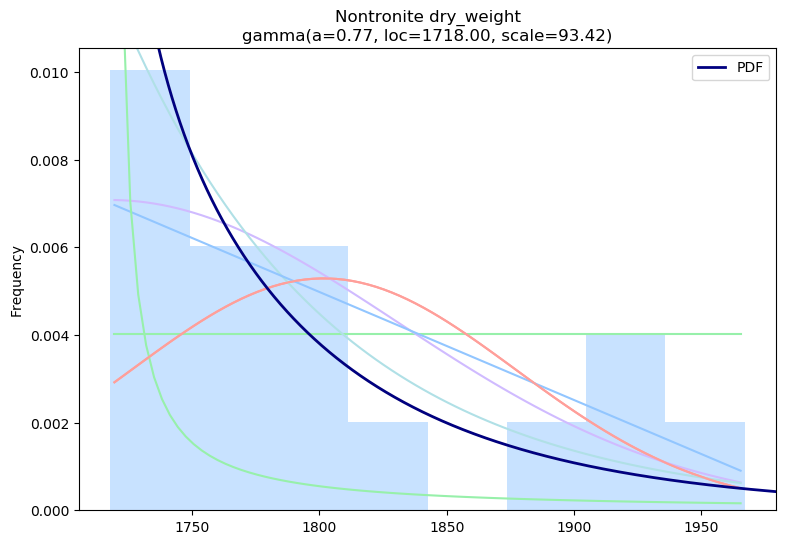

start water_cont
bins 8
Distribution found: t


<Figure size 640x480 with 0 Axes>

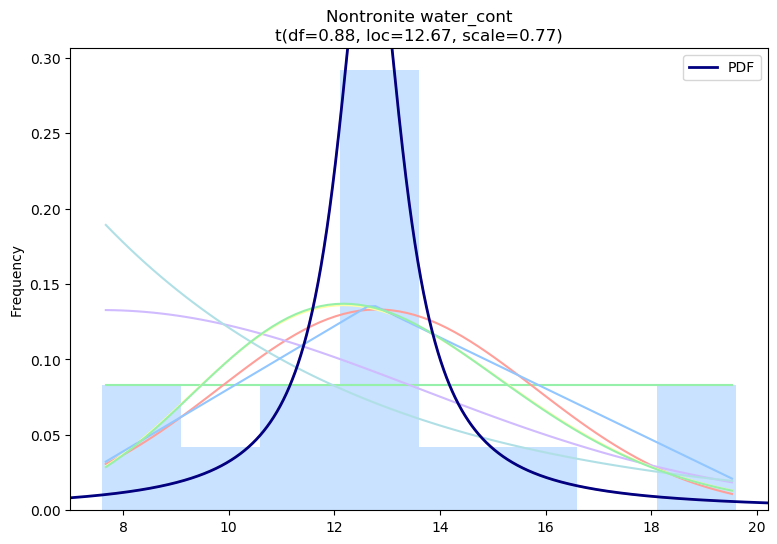

start UCS
bins 8
Distribution found: triang


<Figure size 640x480 with 0 Axes>

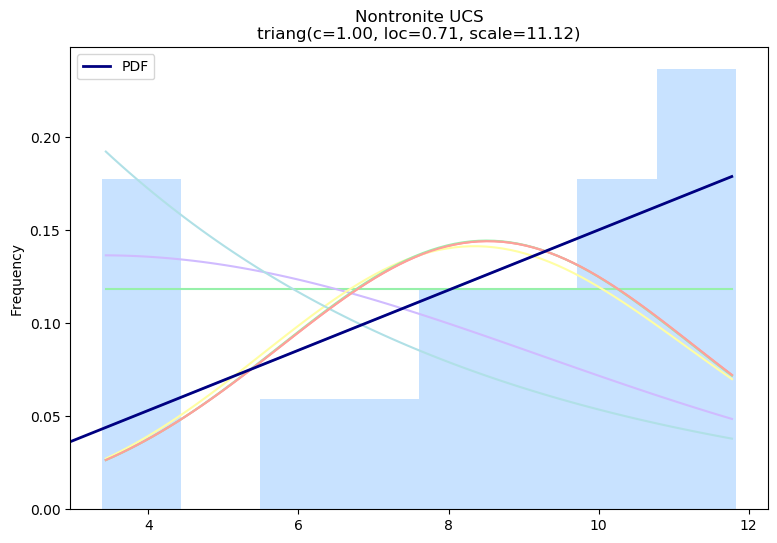

start elastic_mod
bins 8
Distribution found: expon


<Figure size 640x480 with 0 Axes>

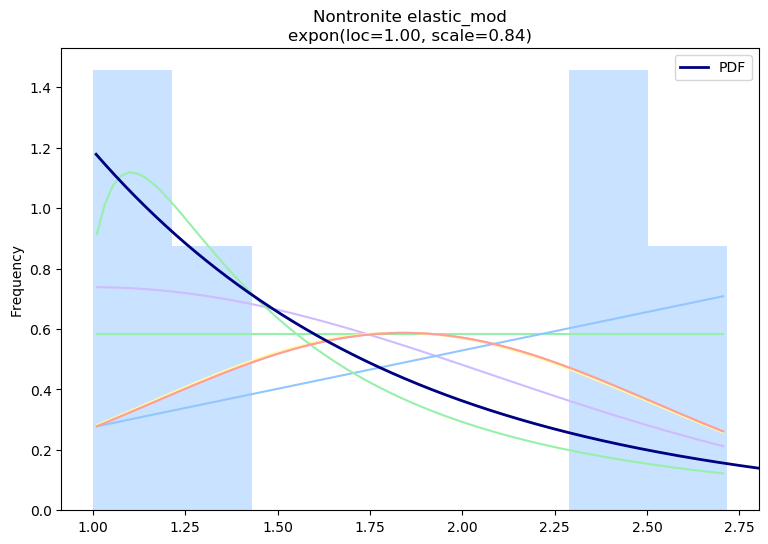

start dry_weight
bins 11
Distribution found: t


<Figure size 640x480 with 0 Axes>

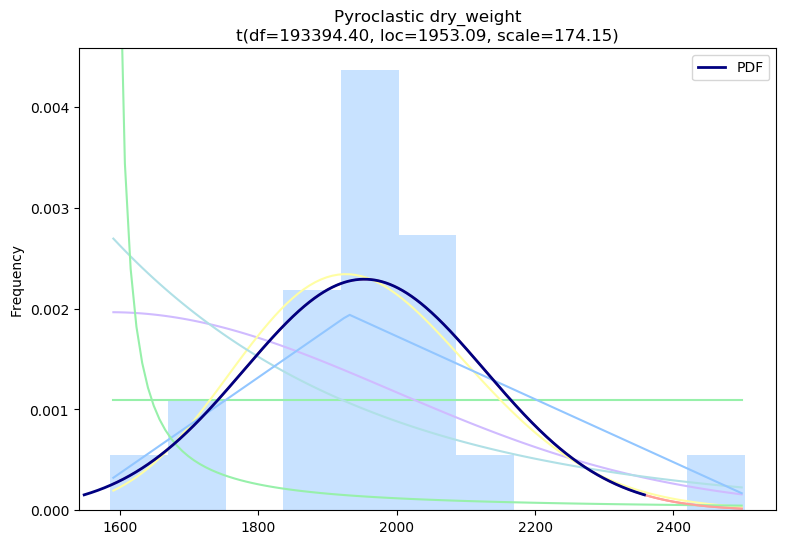

start water_cont
bins 11
Distribution found: t


<Figure size 640x480 with 0 Axes>

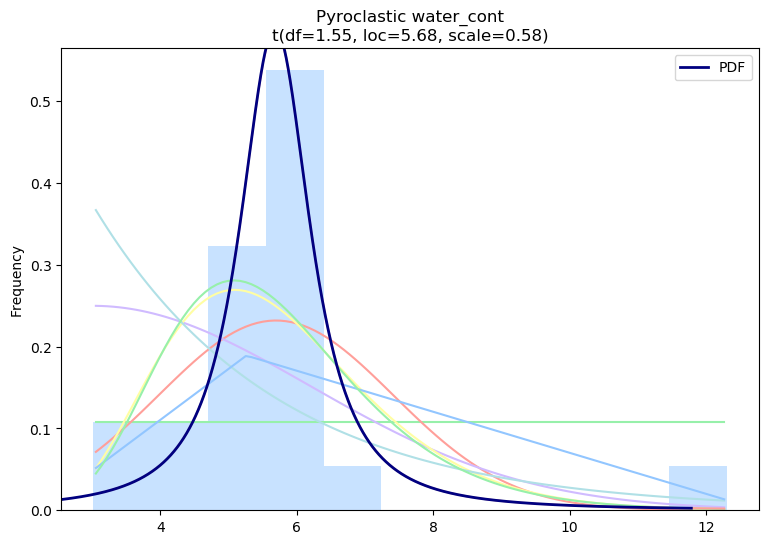

start UCS
bins 11
Distribution found: t


<Figure size 640x480 with 0 Axes>

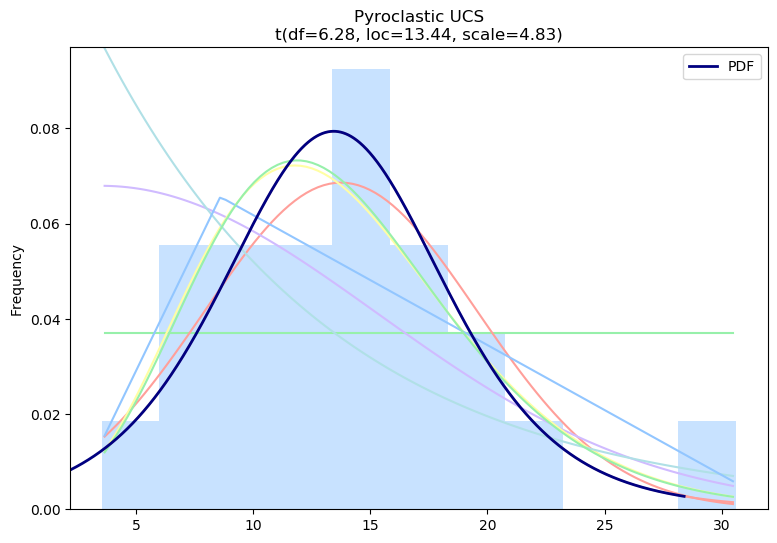

start elastic_mod
bins 11
Distribution found: lognorm


<Figure size 640x480 with 0 Axes>

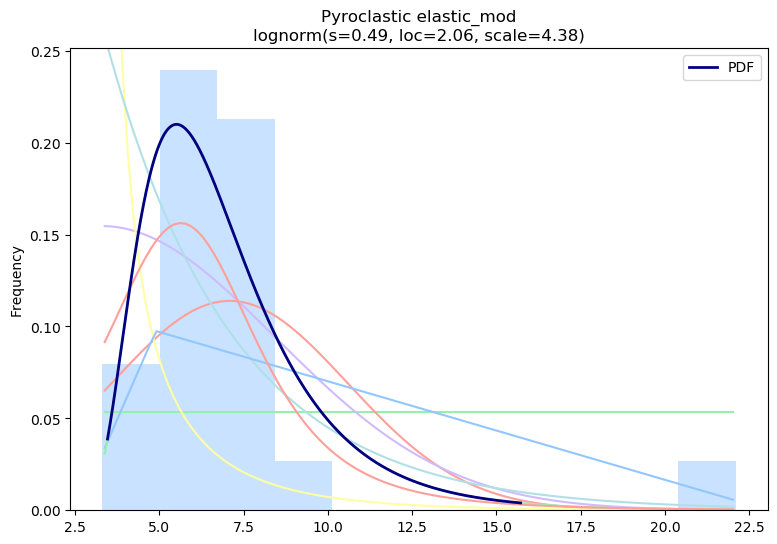

In [562]:
dict_names = {1:'Basalt ',2:'Nontronite',3:'Pyroclastic'}
dict_names2 = {0:'pyroclastic',1:'Basalt strong',2:'Nontronite',3:'Basalt strong II', 4:'Basalt Weak'}

for ee in [1,2,3]:
    
    # MUST define dfg
    
    dfg=df1[df1.type==ee].loc[:,['dry_weight','water_cont','UCS','elastic_mod']].copy()
    dfg_index = dfg.index
    n_cols = dfg.shape[1]
    
    # Load data from statsmodels datasets

    matplotlib.rcParams.update(matplotlib.rcParamsDefault)
    
    ax.clear()

    with plt.style.context(("seaborn-pastel",)):

        par_dict={}

        for e in np.arange(0,n_cols,1):

            print('start '+str(dfg.iloc[:,e].name))

            data = dfg.iloc[:,e].dropna().reset_index(drop=True).copy()
            data = pd.Series(data.values.ravel())

            bins = int(len(data)/2)
            print('bins '+str(bins))

            y, x = np.histogram(data, bins=bins, density=True)
            x = (x + np.roll(x, -1))[:-1] / 2.0  #per ogni bin (x1 + x2)/2 trovo xc centroid


            # Plot for comparison all distribution lines *********
            
            plt.figure(figsize=(9,6))
            ax = data.plot(kind='hist', bins=bins, density=True, alpha=0.5)
            # Save plot limits

            dataYLim = ax.get_ylim()
            dataXLim = ax.get_xlim()   #(ax.get_xlim()[0]*0.8,ax.get_xlim()[1]*1.2)
            
            ax.set_xlabel('')
            ax.set_ylabel('Frequency')

            # Find best fit distribution
            best_fit_name, best_fit_params = best_fit_distribution(data, bins*10, ax)
            best_dist = getattr(st, best_fit_name)

            print('Distribution found: '+str(best_fit_name))
            
            
            ax.set_ylim(dataYLim)
            ax.set_xlim(dataXLim)



            # Make PDF with best params 
            pdf = make_pdf(best_dist, best_fit_params)

            # Display

            
            ax = pdf.plot(lw=2, label='PDF', color='Navy', legend=True)
            
            param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
            param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
            dist_str = '{}({})'.format(best_fit_name, param_str)

            ax.set_title(dict_names[int(ee)]+' '+dfg.columns[e] + u'\n' + dist_str)

            ax.set_ylim(dataYLim)
            ax.set_xlim(dataXLim)
            plt.show()
            
            
            ## Save a file
            plt.savefig('PIC//'+dict_names[int(ee)]+' '+dfg.columns[e]+'.jpg')
            
            # export a list  "par_list" with all results
            par_list = ([(k,v) for k,v in zip(param_names, best_fit_params)])
            par_dict[dfg.columns[e] + '_'+best_fit_name] = par_list               # parameters dictionary

In [563]:
 dfg=df1[df1.pred_class==0].loc[:,['dry_weight','water_cont','UCS','elastic_mod']].copy()

In [564]:
dfg.index

Int64Index([], dtype='int64')

In [565]:
df1.describe()

index   dry_weight  water_cont         UCS  elastic_mod    poisson  \
count  96.000000    96.000000   96.000000   96.000000    96.000000  96.000000   
mean   47.500000  2227.562500    5.765065   39.060062    26.124531   0.201051   
std    27.856777   444.174215    4.625100   43.338925    27.638661   0.079082   
min     0.000000  1586.000000    0.300000    3.380000     1.000000   0.040000   
25%    23.750000  1827.250000    1.000000   10.047500     6.075000   0.145740   
50%    47.500000  2047.000000    5.430000   16.150000     9.318750   0.200000   
75%    71.250000  2744.250000    9.925000   61.850000    51.975000   0.250726   
max    95.000000  2917.000000   19.600000  158.900000    97.100000   0.410000   

           type  
count  96.00000  
mean    1.62500  
std     0.83666  
min     1.00000  
25%     1.00000  
50%     1.00000  
75%     2.00000  
max     3.00000

start dry_weight
bins 8
Distribution found: gamma


<Figure size 640x480 with 0 Axes>

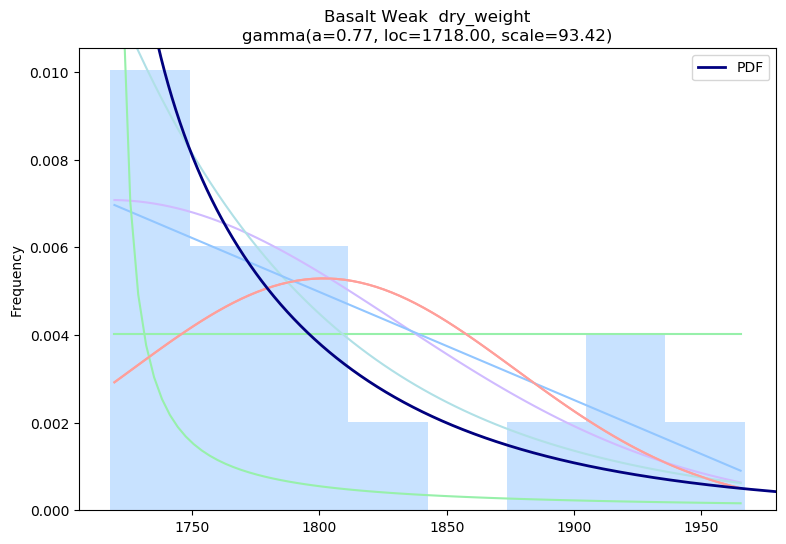

start water_cont
bins 8
Distribution found: t


<Figure size 640x480 with 0 Axes>

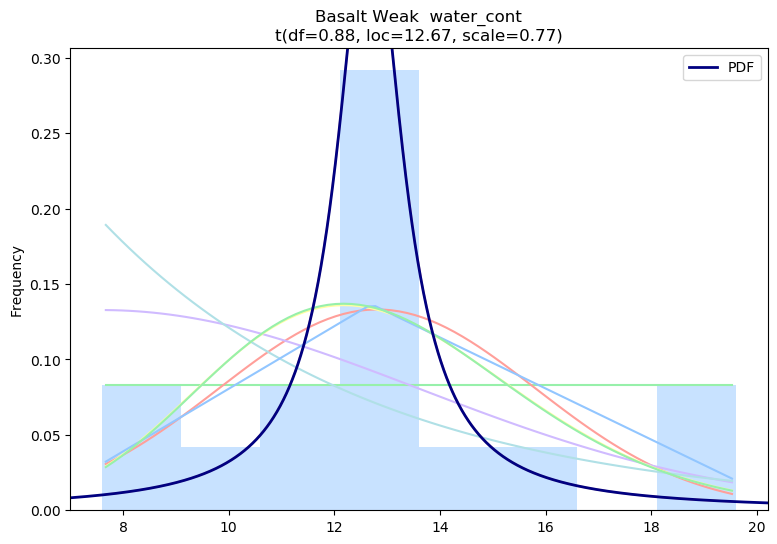

start UCS
bins 8
Distribution found: triang


<Figure size 640x480 with 0 Axes>

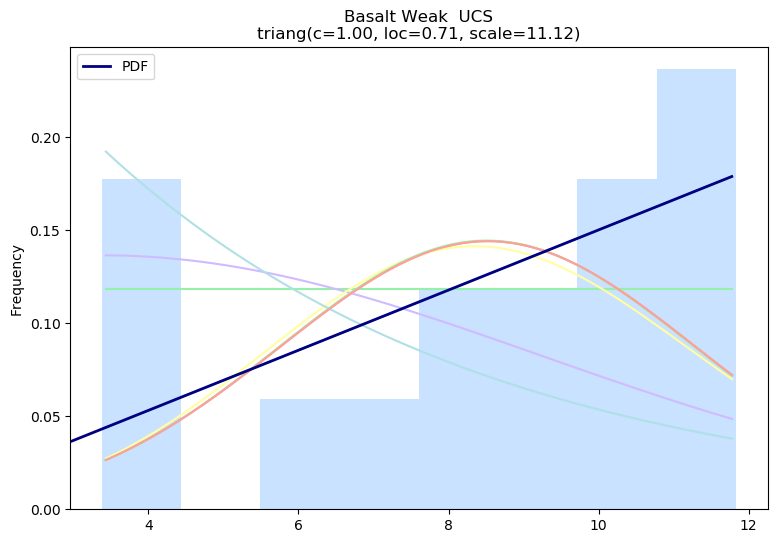

start elastic_mod
bins 8
Distribution found: expon


<Figure size 640x480 with 0 Axes>

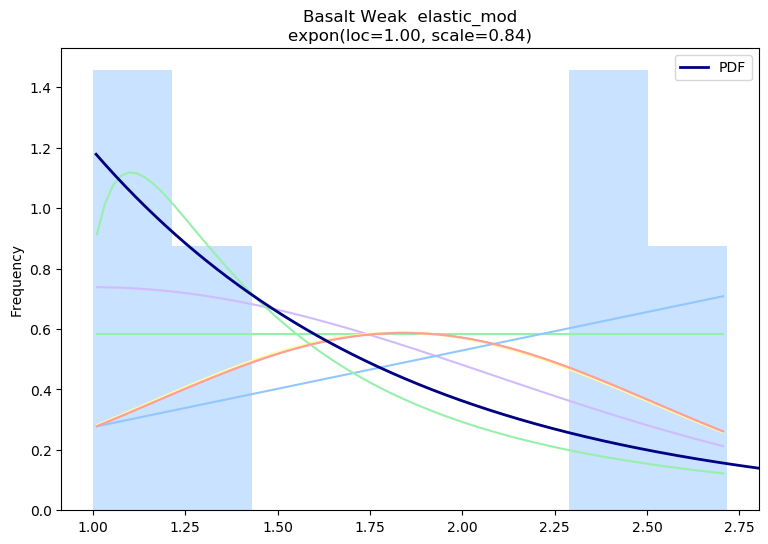

start dry_weight
bins 11
Distribution found: t


<Figure size 640x480 with 0 Axes>

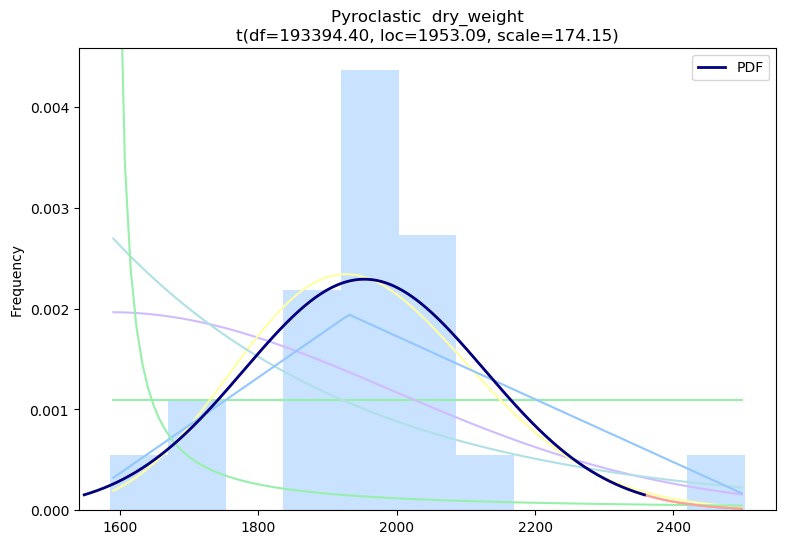

start water_cont
bins 11
Distribution found: t


<Figure size 640x480 with 0 Axes>

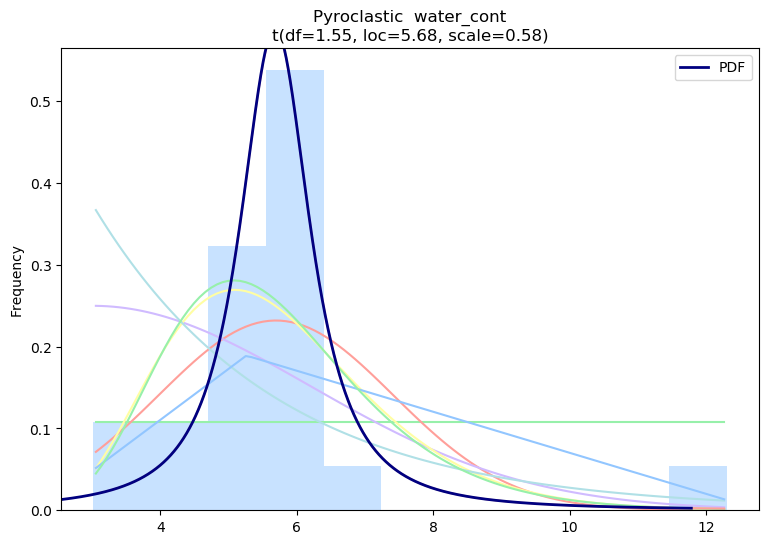

start UCS
bins 11
Distribution found: t


<Figure size 640x480 with 0 Axes>

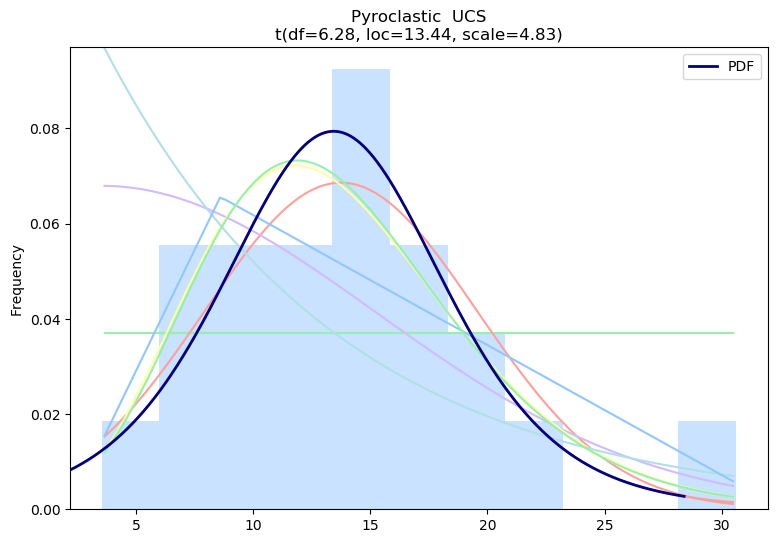

start elastic_mod
bins 11
Distribution found: lognorm


<Figure size 640x480 with 0 Axes>

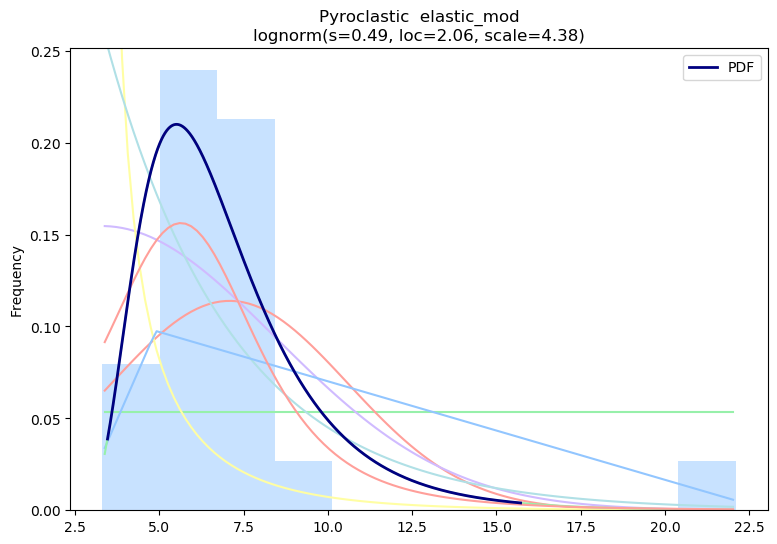

start dry_weight
bins 12
Distribution found: gamma


<Figure size 640x480 with 0 Axes>

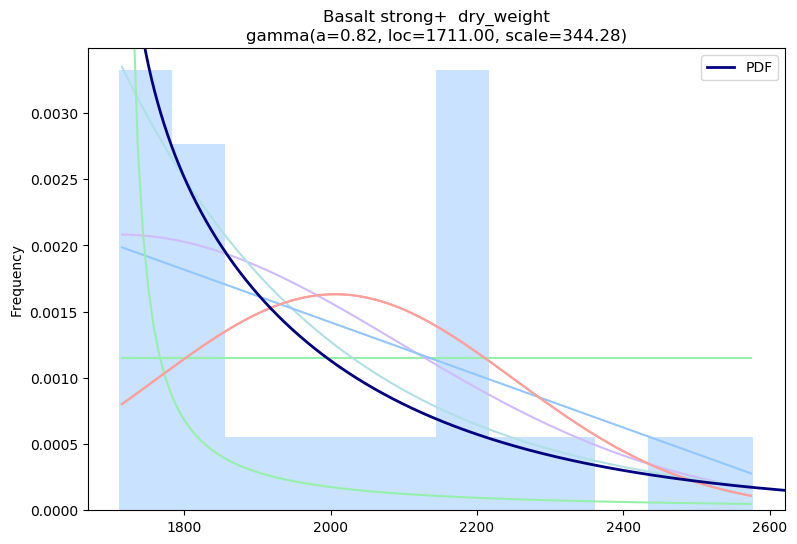

start water_cont
bins 12
Distribution found: uniform


<Figure size 640x480 with 0 Axes>

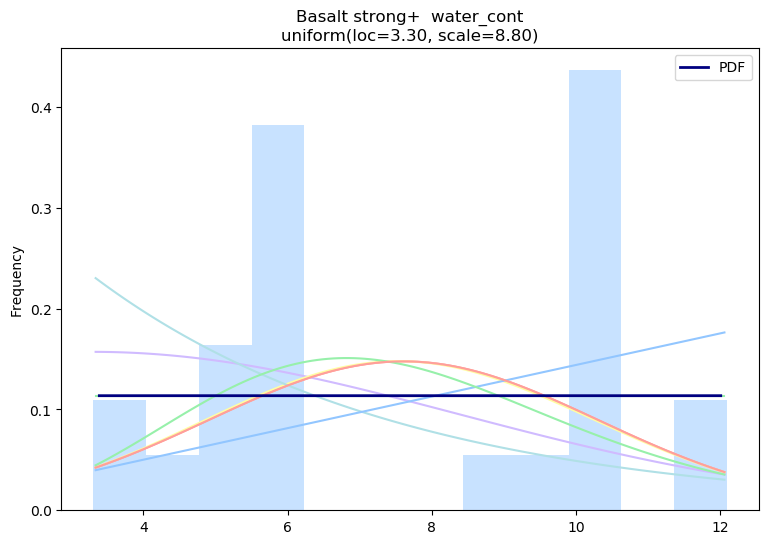

start UCS
bins 12
Distribution found: halfnorm


<Figure size 640x480 with 0 Axes>

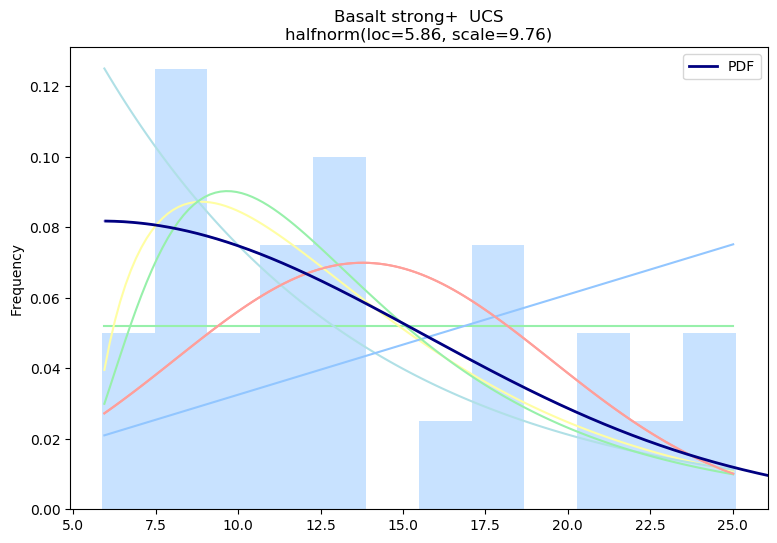

start elastic_mod
bins 12
Distribution found: lognorm


<Figure size 640x480 with 0 Axes>

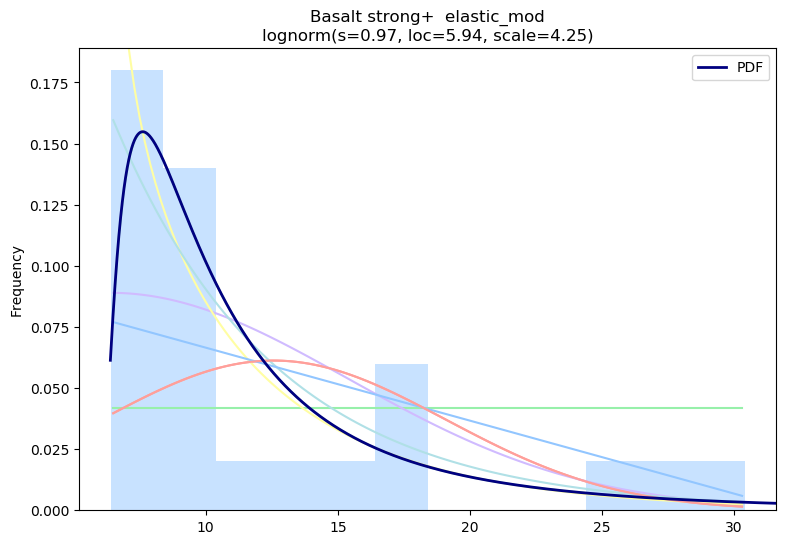

start dry_weight
bins 11
Distribution found: triang


<Figure size 640x480 with 0 Axes>

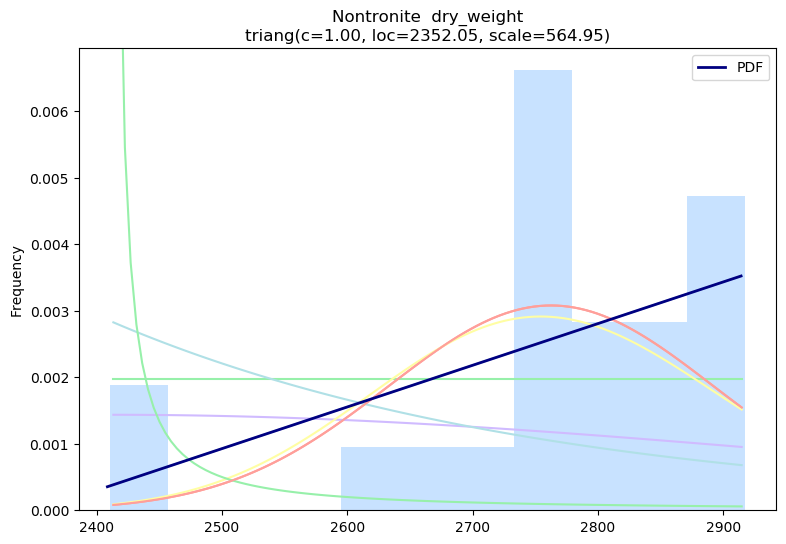

start water_cont
bins 11
Distribution found: lognorm


<Figure size 640x480 with 0 Axes>

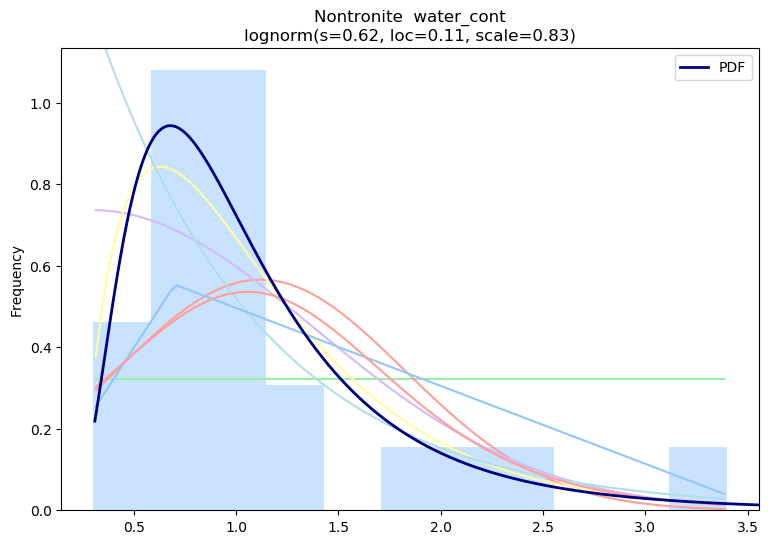

start UCS
bins 11
Distribution found: uniform


<Figure size 640x480 with 0 Axes>

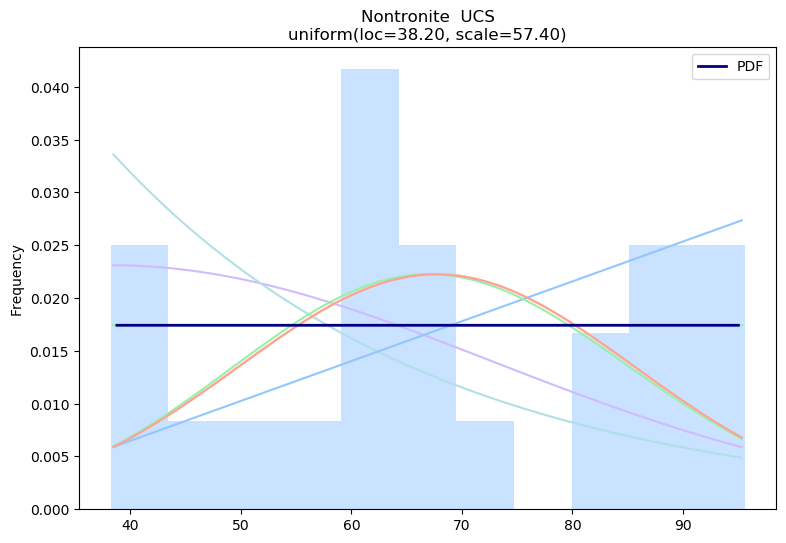

start elastic_mod
bins 11
Distribution found: triang


<Figure size 640x480 with 0 Axes>

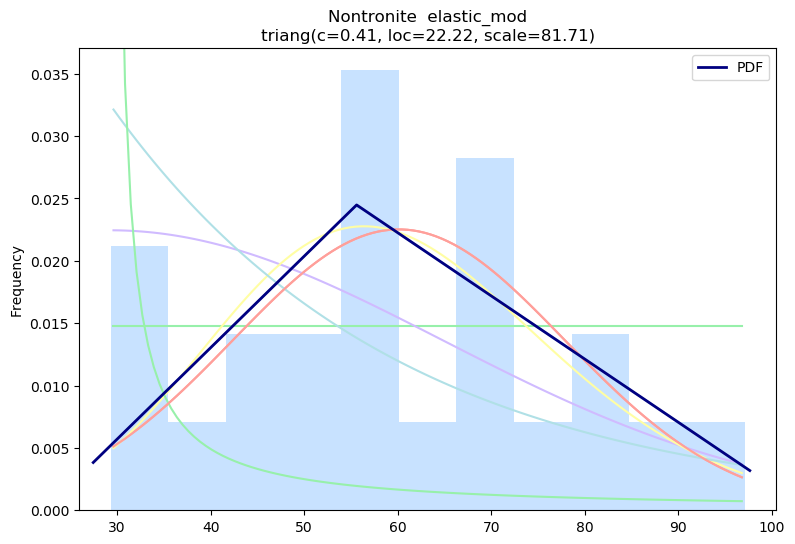

start dry_weight
bins 5
Distribution found: triang


<Figure size 640x480 with 0 Axes>

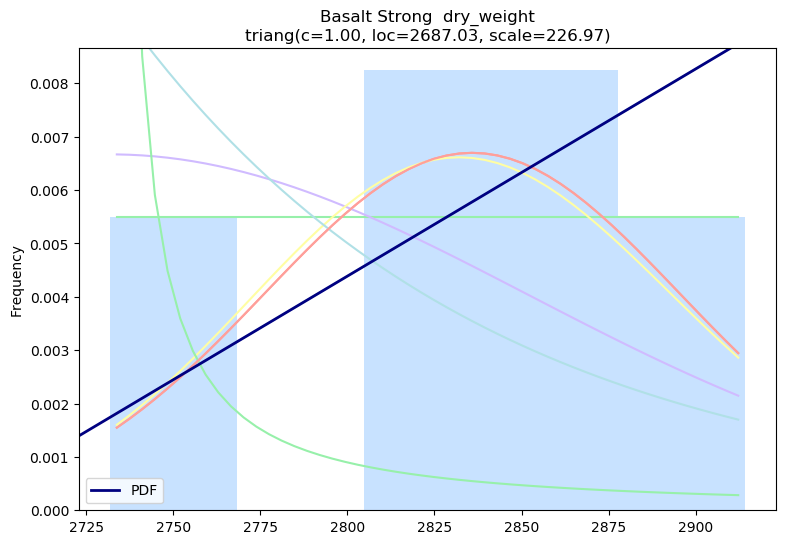

start water_cont
bins 5
Distribution found: triang


<Figure size 640x480 with 0 Axes>

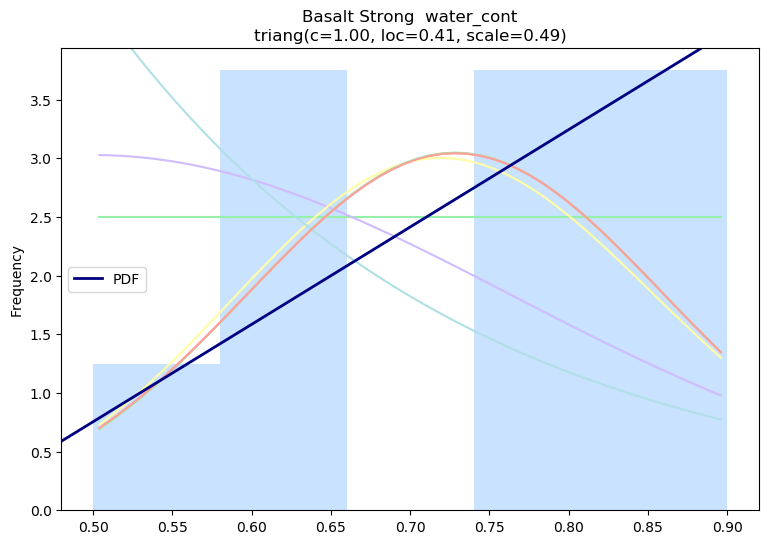

start UCS
bins 5
Distribution found: uniform


<Figure size 640x480 with 0 Axes>

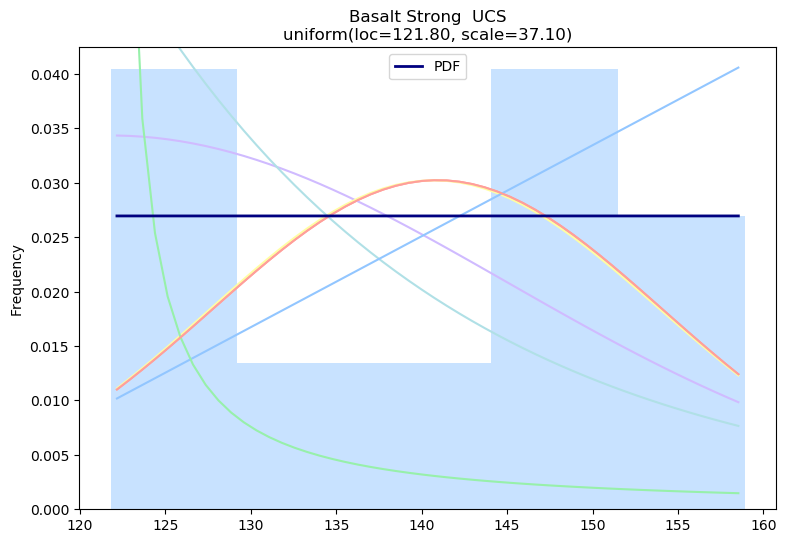

start elastic_mod
bins 5
Distribution found: t


<Figure size 640x480 with 0 Axes>

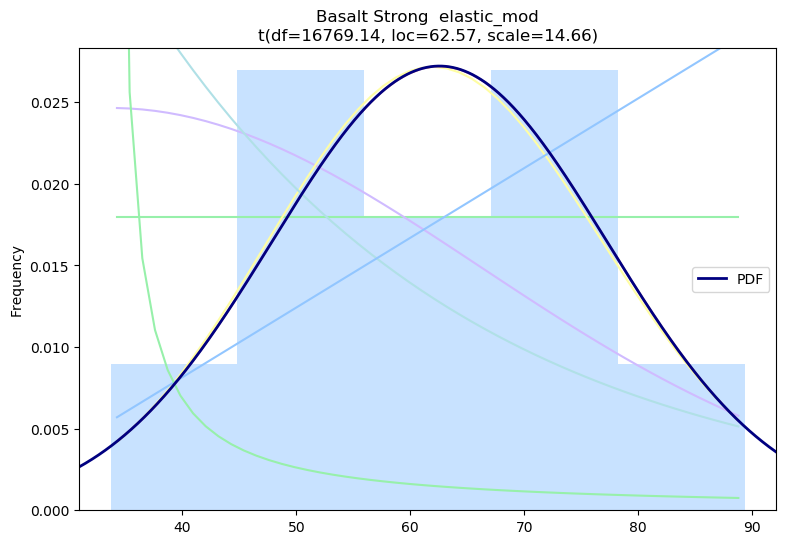

In [566]:
# ATTENZIONE I NOMI SONO SPARSI IN QUANTO IL CLASSIFICATORE NON SEGUE UN ORDINE PRECISO

# GR0  Basalt Weak
# GR1  Pyroclastic
# GR2  Basalt Strong +
# GR3  Nontronite
# GR4  Basalt Strong


dict_names = {1:'basalt',2:'nontronite',3:'pyroclastic'}
dict_names2 = {0:'pyroclastic',1:'Basalt strong',2:'Nontronite',3:'Basalt strong +', 4:'Basalt Weak'}
dict_names2 = {0:'Basalt Weak ',1:'Pyroclastic ',2:'Basalt strong+ ',3:'Nontronite ', 4:'Basalt Strong '}



list_class = df1.pred_class.unique().tolist()
list_class.sort()

for ee in list_class:
    
    # MUST define dfg
    
    dfg=df1[df1.pred_class==ee].loc[:,['dry_weight','water_cont','UCS','elastic_mod']].copy()
    
    dfg_index = dfg.index
    n_cols = dfg.shape[1]
    
    # Load data from statsmodels datasets

    matplotlib.rcParams.update(matplotlib.rcParamsDefault)
    
    ax.clear()

    with plt.style.context(("seaborn-pastel",)):

        par_dict={}

        for e in np.arange(0,n_cols,1):

            print('start '+str(dfg.iloc[:,e].name))

            data = dfg.iloc[:,e].dropna().reset_index(drop=True).copy()
            data = pd.Series(data.values.ravel())

            bins = int(len(data)/2)
            print('bins '+str(bins))

            y, x = np.histogram(data, bins=bins, density=True)
            x = (x + np.roll(x, -1))[:-1] / 2.0  #per ogni bin (x1 + x2)/2 trovo xc centroid


            # Plot for comparison all distribution lines *********
            
            plt.figure(figsize=(9,6))
            ax = data.plot(kind='hist', bins=bins, density=True, alpha=0.5)
            # Save plot limits

            dataYLim = ax.get_ylim()
            dataXLim = ax.get_xlim()   #(ax.get_xlim()[0]*0.8,ax.get_xlim()[1]*1.2)
            
            ax.set_xlabel('')
            ax.set_ylabel('Frequency')

            # Find best fit distribution
            best_fit_name, best_fit_params = best_fit_distribution(data, bins*10, ax)
            best_dist = getattr(st, best_fit_name)

            print('Distribution found: '+str(best_fit_name))
            
            
            ax.set_ylim(dataYLim)
            ax.set_xlim(dataXLim)



            # Make PDF with best params 
            pdf = make_pdf(best_dist, best_fit_params)

            # Display

            
            ax = pdf.plot(lw=2, label='PDF', color='Navy', legend=True)
            
            param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
            param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
            dist_str = '{}({})'.format(best_fit_name, param_str)

            ax.set_title(dict_names2[int(ee)]+' '+dfg.columns[e] + u'\n' + dist_str)

            ax.set_ylim(dataYLim)
            ax.set_xlim(dataXLim)
            plt.show()
            
            
            ## Save a file
            plt.savefig('PIC//'+dict_names2[int(ee)]+' '+dfg.columns[e]+'.jpg')
            
            # export a list  "par_list" with all results
            par_list = ([(k,v) for k,v in zip(param_names, best_fit_params)])
            par_dict[dfg.columns[e] + '_'+best_fit_name] = par_list               # parameters dictionary

            

#### STATISTICHE FINALI

In [567]:
df3=df1.drop(columns='name').copy()

In [568]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 10 columns):
index          96 non-null int64
dry_weight     96 non-null int64
water_cont     96 non-null float64
UCS            96 non-null float64
elastic_mod    96 non-null float64
poisson        96 non-null float64
type           96 non-null int64
rock_type      96 non-null object
pred_class     96 non-null object
type_str       96 non-null object
dtypes: float64(4), int64(3), object(3)
memory usage: 7.6+ KB


In [569]:
df3.describe(include='all', percentiles=[.05,.95])

index   dry_weight  water_cont         UCS  elastic_mod  \
count   96.000000    96.000000   96.000000   96.000000    96.000000   
unique        NaN          NaN         NaN         NaN          NaN   
top           NaN          NaN         NaN         NaN          NaN   
freq          NaN          NaN         NaN         NaN          NaN   
mean    47.500000  2227.562500    5.765065   39.060062    26.124531   
std     27.856777   444.174215    4.625100   43.338925    27.638661   
min      0.000000  1586.000000    0.300000    3.380000     1.000000   
5%       4.750000  1718.750000    0.600000    6.115000     1.276724   
50%     47.500000  2047.000000    5.430000   16.150000     9.318750   
95%     90.250000  2881.000000   12.975000  139.900000    78.200000   
max     95.000000  2917.000000   19.600000  158.900000    97.100000   

          poisson      type rock_type pred_class type_str  
count   96.000000  96.00000        96         96       96  
unique        NaN       NaN         5          5        3  
top           NaN       NaN      BS-S          2   Basalt  
freq          NaN       NaN        34         25       58  
mean     0.201051   1.62500       NaN        NaN      NaN  
std      0.079082   0.83666       NaN        NaN      NaN  
min      0.040000   1.00000       NaN        NaN      NaN  
5%       0.075000   1.00000       NaN        NaN      NaN  
50%      0.200000   1.00000       NaN        NaN      NaN  
95%      0.345000   3.00000       NaN        NaN      NaN  
max      0.410000   3.00000       NaN        NaN      NaN

In [570]:
df3.groupby('pred_class').describe(include='all', percentiles=[.05,.95])['dry_weight']

count  unique  top  freq         mean         std     min  \
pred_class                                                              
0            16.0     NaN  NaN   NaN  1801.750000   77.873830  1718.0   
1            22.0     NaN  NaN   NaN  1953.090909  178.247262  1586.0   
2            25.0     NaN  NaN   NaN  2006.120000  249.654481  1711.0   
3            23.0     NaN  NaN   NaN  2762.565217  132.454392  2411.0   
4            10.0     NaN  NaN   NaN  2835.800000   62.804458  2732.0   

                 5%     50%      95%     max  
pred_class                                    
0           1718.75  1777.5  1936.25  1967.0  
1           1676.20  1943.0  2140.35  2503.0  
2           1729.40  1975.0  2443.80  2578.0  
3           2442.60  2758.0  2892.40  2917.0  
4           2742.80  2843.0  2912.20  2914.0

In [571]:
df3.groupby('pred_class').describe(include='all', percentiles=[.05,.95])['UCS']

count  unique  top  freq        mean        std     min       5%  \
pred_class                                                                     
0            16.0     NaN  NaN   NaN    8.523750   2.856601    3.38    3.575   
1            22.0     NaN  NaN   NaN   13.747273   5.953456    3.54    6.240   
2            25.0     NaN  NaN   NaN   13.782000   5.826070    5.86    7.210   
3            23.0     NaN  NaN   NaN   67.704348  18.337728   38.20   39.590   
4            10.0     NaN  NaN   NaN  140.919600  13.905830  121.80  123.510   

               50%       95%     max  
pred_class                            
0             9.50   11.3575   11.83  
1            14.10   21.0200   30.60  
2            12.36   24.0400   25.10  
3            64.60   94.8700   95.60  
4           143.00  158.7200  158.90

In [572]:
df3.groupby('pred_class').describe(include='all', percentiles=[.05,.95])['elastic_mod']

count  unique  top  freq       mean        std   min         5%  \
pred_class                                                                    
0            16.0     NaN  NaN   NaN   1.840356   0.701703   1.0   1.000000   
1            22.0     NaN  NaN   NaN   7.089660   3.584383   3.3   4.425000   
2            25.0     NaN  NaN   NaN  12.565471   6.647674   6.4   6.953964   
3            23.0     NaN  NaN   NaN  60.119565  18.116722  29.3  33.640000   
4            10.0     NaN  NaN   NaN  62.565000  15.453587  33.7  41.845000   

                  50%        95%        max  
pred_class                                   
0            1.800873   2.704212   2.716846  
1            6.650000   8.950000  22.100000  
2           10.258348  27.080000  30.400000  
3           57.900000  88.725000  97.100000  
4           63.650000  83.792500  89.350000

##  KMEANS CLASSIFIER  BS WEAK

In [823]:
df4 = df0[(df0.type!=3) & (df0.UCS<30)].copy()  # tolgo le pyroclastiti e UCS >30
try:
    df4 = df4[['dry_weight','water_cont','UCS','elastic_mod']]
except:
    print('error occurred')

In [824]:
index_df4 = df4.index
df4_col = df4.columns
df4.head(3)

dry_weight  water_cont    UCS  elastic_mod
3        2240        4.78  24.40    15.900000
4        2578        5.09  22.60    16.600000
6        1819        9.90  12.36    10.388162

In [825]:
# normalize columns  df4 will be a normalized dataframe

x = df4.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df4 = pd.DataFrame(x_scaled)
df4.columns = df4_col
df4.index =  index_df4 


In [826]:
df4.UCS *= 0.6
df4.elastic_mod *= 1
df4.dry_weight *= 1
df4.water_cont *= 0

In [827]:
# Loading dataset       --> df4 normalized df    --> df5 is ready to plot df

n_cluster = 5
model = KMeans(n_clusters=n_cluster)

model.fit(df4)

all_prediction= model.predict(df4)
all_prediction

array([3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 3, 1, 3, 1, 3,
       3, 3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [828]:
# Insert classes into the main df

df5 = df0.loc[index_df4,:].copy()
df5['pred_class']=all_prediction           #insert the class calculated
df5['pred_class'] = df5['pred_class'].astype(str)  # avoid continuous color scale on pred_class

In [829]:
df5.rock_type.unique()

array(['BS-W-Ves', 'BS-W_Am', 'BS-S', 'BS-W_Nt'], dtype=object)

In [830]:
df5.columns

Index(['index', 'name', 'dry_weight', 'water_cont', 'UCS', 'elastic_mod',
       'poisson', 'type', 'rock_type', 'pred_class'],
      dtype='object')

#### REORDER NUMBER OF GROUPS 

In [831]:
clust_cent = model.cluster_centers_     # row for each class

Rdist = []
for ii in np.arange(0,clust_cent.shape[0],1):
    R = 0   
    for ee in np.arange(2,4,1):   # only for position 2,3 UCS-mod-elast
        R += clust_cent[ii][ee]**2
    Rdist.append(np.sqrt(R))

dfgroups = pd.DataFrame({"R":Rdist}).sort_values('R').reset_index().reset_index()
neworder = []
oldorder = []
neworder = ''.join([str(elem) for elem in dfgroups.iloc[:,0].tolist()])
oldorder = ''.join([str(elem) for elem in dfgroups.iloc[:,1].tolist()])
dict_groups = dict(zip(oldorder,neworder))
dict_groups

df5['pred_class'] = df5['pred_class'].apply(lambda x: dict_groups[x])

### PLOT 

In [832]:
df5.to_csv('df5.csv')

In [833]:
# Define color sequence

color_discrete_sequence=px.colors.qualitative.G10
color_discrete_sequence=px.colors.sequential.Plasma
color_discrete_sequence=['#0d0887', '#7201a8', '#bd3786', '#ed7953', '#fdca26', '#f0f921']
color_discrete_sequence=['#0d0887', '#7201a8', '#bd3786', '#ed7953', '#f0f921']

In [834]:
symbol_sequence=[0,200,1,201,28]


labels={'elastic_mod':'E Young [GPa]','UCS':'UCS  [MPa]', 'dry_weight':'Dry weight [kg/m³]'}

In [835]:
size=df5.UCS-df5.UCS.max()/df5.UCS.max()

y="elastic_mod"
x="UCS"
fig = px.scatter(df5, x=x, y=y, color="pred_class",
                 size=size, hover_data=['dry_weight','name','poisson','rock_type','type','pred_class'],
                 opacity=0.6, facet_row="type",log_x=True, labels=labels, color_discrete_sequence=color_discrete_sequence)


labels={'elastic_mod':'E Young [GPa]','UCS':'UCS  [MPa]', 'dry_weight':'Dry weight [kg/m³]'}

xmin = np.log10(df5[x].min()*1.5)
xmax = np.log10(df5[x].max()*1.5)
ymin = 0
ymax = df5[y].max()*1.5

fig.update_layout(
    autosize=False,
    width=1000,
    height=700)

fig.update_xaxes(range=[xmin,xmax])
fig.update_yaxes(showline=True, linewidth=0.1, range=[ymin,ymax])


fig.show()

In [836]:
import plotly.express as px
import matplotlib
import plotly.graph_objects as go



x = "dry_weight"
y = "elastic_mod"


symbol_sequence=[0,200,1,201,28]  

size=df5.UCS-df5.UCS.max()/df5.UCS.max()

fig = px.scatter(df5, x=x, y=y, color="pred_class",symbol="rock_type",symbol_sequence=symbol_sequence,labels=labels,
                 size=size, hover_data=['dry_weight','name','poisson','rock_type','type','pred_class'],
                 opacity=0.6, color_discrete_sequence=color_discrete_sequence) #text="name"

xmin = df5[x].min()*0.8
xmax = df5[x].max()*1.2
ymin = df5[y].min()*0.8
ymax = df5[y].max()*1.2


fig.update_xaxes(range=[xmin, xmax])
fig.update_yaxes(showline=True, linewidth=0.1, range=[ymin, ymax])


fig.update_layout(title='Elastic modulus - dry weight - Classification',
    autosize=False,
    width=1000,
    height=500)

fig.update_layout({'legend_orientation':'v'})


fig.show()

In [837]:
x = "dry_weight"
y = "UCS"



size=df5.elastic_mod**0.4

fig = px.scatter(df5, x=x, y=y, color="pred_class",symbol="rock_type",symbol_sequence=symbol_sequence,labels=labels,
                 size=size, hover_data=['dry_weight','name','poisson','rock_type','type','pred_class'],
                 opacity=0.6, color_discrete_sequence=color_discrete_sequence) #text="name"

xmin = df5[x].min()*0.8
xmax = df5[x].max()*1.2
ymin = df5[y].min()*0.8
ymax = df5[y].max()*1.2


fig.update_xaxes(range=[xmin, xmax])
fig.update_yaxes(showline=True, linewidth=0.1, range=[ymin, ymax])


fig.update_layout(title='Elastic modulus - dry weight - Classification',
    autosize=False,
    width=1000,
    height=500)

fig.update_layout({'legend_orientation':'v'})


fig.show()

What is interesting from graph above is that the classification is made considering the "elastic modulus" and the "unit weight" in addition alsa the UCS is consideredeight (size of the circles) this means consistency in the classification procedure

In [838]:


size=(df5.dry_weight)**4
fig = px.scatter(df5, x="UCS", y="elastic_mod", color="pred_class",symbol="rock_type",symbol_sequence=symbol_sequence,
                 size=size, hover_name="rock_type",hover_data=['dry_weight','name','poisson','rock_type','type','pred_class'],
                 opacity=0.6, log_y=True, log_x=True,labels=labels, color_discrete_sequence=color_discrete_sequence)


fig.update_layout({'legend_orientation':'v'})

x1 = np.linspace(3,30,2000)
y1 = x1*1.8
y2 = x1*1
y3 = x1*0.5
y4 = x1*0.2

fig.add_scatter(x=x1, y=y1, mode="lines", line = dict(color='royalblue', width=1, dash='dash'), name='Mod_R=1800')
fig.add_scatter(x=x1, y=y2, mode="lines", line = dict(color='red', width=1, dash='dash'), name='Mod_R=1000')
fig.add_scatter(x=x1, y=y3, mode="lines", line = dict(color='green', width=1, dash='dash'), name='Mod_R=500')
fig.add_scatter(x=x1, y=y4, mode="lines", line = dict(color='grey', width=1, dash='dash'), name='Mod_R=200')

fig.show()

What is interesting from graph above is that the classification is made considering the elastic modulus UCS ratio and the unit weight (size of the circles) this means consistency in the classification procedure

In [839]:
size=(df5.dry_weight)**4
fig = px.scatter(df5, x="UCS", y="elastic_mod", color="pred_class",symbol="rock_type",symbol_sequence=symbol_sequence,
                 size=size, hover_name="rock_type",hover_data=['dry_weight','name','poisson','rock_type','type','pred_class'],
                 opacity=0.6,labels=labels, color_discrete_sequence=color_discrete_sequence)


fig.update_layout({'legend_orientation':'v'})

x1 = np.linspace(0.1,30,2000)
y1 = x1*1.8
y2 = x1*1
y3 = x1*0.5
y4 = x1*0.2

fig.add_scatter(x=x1, y=y1, mode="lines", line = dict(color='royalblue', width=1, dash='dash'), name='Mod_R=1800')
fig.add_scatter(x=x1, y=y2, mode="lines", line = dict(color='red', width=1, dash='dash'), name='Mod_R=1000')
fig.add_scatter(x=x1, y=y3, mode="lines", line = dict(color='green', width=1, dash='dash'), name='Mod_R=500')
fig.add_scatter(x=x1, y=y4, mode="lines", line = dict(color='grey', width=1, dash='dash'), name='Mod_R=200')

fig.show()

In [840]:
size=df5.elastic_mod
fig = px.scatter(df5, x="water_cont", y="UCS", color="pred_class",symbol="rock_type",symbol_sequence=symbol_sequence,
                 size=size, hover_data=['dry_weight','name','poisson','rock_type','type','pred_class'],
                 opacity=0.6, log_x=True,labels=labels, color_discrete_sequence=color_discrete_sequence)


# fig.update_xaxes(range=[0.7,2.3])
# fig.update_yaxes(showline=True, linewidth=0.1, range=[-10, 110])


fig.update_layout(title='UCS - water content - Classification',
    autosize=False,
    width=1000,
    height=500)



fig.update_layout({'legend_orientation':'v'})

fig.show()

In [841]:
df4['UCS_log'] = df0.UCS.map(lambda x: np.log10(x))
df4['ela_log'] = df0.elastic_mod.map(lambda x: np.log10(x))
df4['dry_log'] = df0.dry_weight.map(lambda x: np.log10(x))
df4['UCS_log_u'] = df4.UCS_log.map(lambda x: (x-df4.UCS_log.min())/(df4.UCS_log.max()-df4.UCS_log.min()))
df4['ela_log_u'] = df4.ela_log.map(lambda x: (x-df4.ela_log.min())/(df4.ela_log.max()-df4.ela_log.min()))
df4['dry_log_u'] = df4.dry_log.map(lambda x: (x-df4.dry_log.min())/(df4.dry_log.max()-df4.dry_log.min()))

In [842]:
fig = px.scatter_ternary(df4, a="UCS", b="dry_weight", c="elastic_mod",
                         color=all_prediction.astype('str'), size='UCS', opacity=0.6, 
                         color_discrete_sequence=color_discrete_sequence)

fig.add_scatterternary(mode="markers",marker=dict(
                           size=8, line_color="midnightblue", line_width=1, symbol=33))
fig.show()

In [843]:
size=(df5.dry_weight)**0.8
fig = px.scatter(df5, x="UCS", y="elastic_mod", color="rock_type",symbol_sequence=symbol_sequence,text='pred_class',
                 size=size, hover_name="rock_type",hover_data=['name','type'],
                 opacity=0.6, labels=labels, color_discrete_sequence=color_discrete_sequence)


x1 = np.linspace(0.1,30,2000)
y1 = x1*1.8
y2 = x1*1
y3 = x1*0.5
y4 = x1*0.2

fig.add_scatter(x=x1, y=y1, mode="lines", line = dict(color='royalblue', width=1, dash='dash'), name='Mod_R=1800')
fig.add_scatter(x=x1, y=y2, mode="lines", line = dict(color='red', width=1, dash='dash'), name='Mod_R=1000')
fig.add_scatter(x=x1, y=y3, mode="lines", line = dict(color='green', width=1, dash='dash'), name='Mod_R=500')
fig.add_scatter(x=x1, y=y4, mode="lines", line = dict(color='grey', width=1, dash='dash'), name='Mod_R=200')


fig.update_layout({'legend_orientation':'v'})


fig.show()

In [844]:
stop

NameError: name 'stop' is not defined

### STATISTICS AND DISTRIBUTIONS

In [ ]:
stat1 = rp.summary_cont(df1[['dry_weight','water_cont', 'elastic_mod','UCS']])
stat1['CV'] = stat1.SD/stat1.Mean
stat1['CV*'] = stat1.CV*(1+1/4/stat1.N)
stat1

### Second Classification classification after KMEANS classificator

In [ ]:
classe = "0"
descr = df5[df5.pred_class==classe][['dry_weight','water_cont', 'elastic_mod','UCS']].describe().T
stat = rp.summary_cont(df5[df5.pred_class==classe][['dry_weight','water_cont', 'elastic_mod','UCS']])
stat['CV'] = stat.SD/stat.Mean
# stat['CV*'] = stat.CV*(1+1/4/stat.N)
stat['Min'] = np.array(descr['min'])
stat['Max'] = np.array(descr['max'])
stat['Variable'] = ['Dry weight [kg/m³]','Water content [%]','E Young [GPa]','UCS [MPa]']
stat.columns = ['Variable', 'N', 'Mean', 'SD', 'SE', '95% CI inf', '95% CI sup', 'CV', 'Min', 'Max']
stat['Group']=classe
stat = stat[['Group','Variable', 'N', 'Mean', 'SD', 'SE', '95% CI inf', '95% CI sup', 'CV', 'Min', 'Max']].round(2)
stat0 = stat

In [ ]:
classe = "1"
descr = df5[df5.pred_class==classe][['dry_weight','water_cont', 'elastic_mod','UCS']].describe().T
stat = rp.summary_cont(df5[df5.pred_class==classe][['dry_weight','water_cont', 'elastic_mod','UCS']])
stat['CV'] = stat.SD/stat.Mean
# stat['CV*'] = stat.CV*(1+1/4/stat.N)
stat['Min'] = np.array(descr['min'])
stat['Max'] = np.array(descr['max'])
stat['Variable'] = ['Dry weight [kg/m³]','Water content [%]','E Young [GPa]','UCS [MPa]']
stat.columns = ['Variable', 'N', 'Mean', 'SD', 'SE', '95% CI inf', '95% CI sup', 'CV', 'Min', 'Max']
stat['Group']=classe
stat = stat[['Group','Variable', 'N', 'Mean', 'SD', 'SE', '95% CI inf', '95% CI sup', 'CV', 'Min', 'Max']].round(2)
stat1 = stat

In [ ]:
classe = "2"
descr = df5[df5.pred_class==classe][['dry_weight','water_cont', 'elastic_mod','UCS']].describe().T
stat = rp.summary_cont(df5[df5.pred_class==classe][['dry_weight','water_cont', 'elastic_mod','UCS']])
stat['CV'] = stat.SD/stat.Mean
# stat['CV*'] = stat.CV*(1+1/4/stat.N)
stat['Min'] = np.array(descr['min'])
stat['Max'] = np.array(descr['max'])
stat['Variable'] = ['Dry weight [kg/m³]','Water content [%]','E Young [GPa]','UCS [MPa]']
stat.columns = ['Variable', 'N', 'Mean', 'SD', 'SE', '95% CI inf', '95% CI sup', 'CV', 'Min', 'Max']
stat['Group']=classe
stat = stat[['Group','Variable', 'N', 'Mean', 'SD', 'SE', '95% CI inf', '95% CI sup', 'CV', 'Min', 'Max']].round(2)
stat2 = stat

In [ ]:
classe = "3"
descr = df5[df5.pred_class==classe][['dry_weight','water_cont', 'elastic_mod','UCS']].describe().T
stat = rp.summary_cont(df5[df5.pred_class==classe][['dry_weight','water_cont', 'elastic_mod','UCS']])
stat['CV'] = stat.SD/stat.Mean
# stat['CV*'] = stat.CV*(1+1/4/stat.N)
stat['Min'] = np.array(descr['min'])
stat['Max'] = np.array(descr['max'])
stat['Variable'] = ['Dry weight [kg/m³]','Water content [%]','E Young [GPa]','UCS [MPa]']
stat.columns = ['Variable', 'N', 'Mean', 'SD', 'SE', '95% CI inf', '95% CI sup', 'CV', 'Min', 'Max']
stat['Group']=classe
stat = stat[['Group','Variable', 'N', 'Mean', 'SD', 'SE', '95% CI inf', '95% CI sup', 'CV', 'Min', 'Max']].round(2)
stat3 = stat

In [ ]:
classe = "4"
descr = df5[df5.pred_class==classe][['dry_weight','water_cont', 'elastic_mod','UCS']].describe().T
stat = rp.summary_cont(df5[df5.pred_class==classe][['dry_weight','water_cont', 'elastic_mod','UCS']])
stat['CV'] = stat.SD/stat.Mean
# stat['CV*'] = stat.CV*(1+1/4/stat.N)
stat['Min'] = np.array(descr['min'])
stat['Max'] = np.array(descr['max'])
stat['Variable'] = ['Dry weight [kg/m³]','Water content [%]','E Young [GPa]','UCS [MPa]']
stat.columns = ['Variable', 'N', 'Mean', 'SD', 'SE', '95% CI inf', '95% CI sup', 'CV', 'Min', 'Max']
stat['Group']=classe
stat = stat[['Group','Variable', 'N', 'Mean', 'SD', 'SE', '95% CI inf', '95% CI sup', 'CV', 'Min', 'Max']].round(2)
stat4 = stat

In [ ]:
stat0

In [ ]:
stat1

In [ ]:
stat2

In [ ]:
stat3

In [ ]:
stat4

In [ ]:
df5.pred_class.unique()

In [ ]:
# ATTENZIONE I NOMI SONO SPARSI IN QUANTO IL CLASSIFICATORE NON SEGUE UN ORDINE PRECISO

# GR0  Basalt Weak
# GR1  Pyroclastic
# GR2  Basalt Strong +
# GR3  Nontronite
# GR4  Basalt Strong


dict_names = {1:'basalt',2:'nontronite',3:'pyroclastic'}
dict_names2 = {0:'Group 0 ',1:'Group 1 ',2:'Group 2 ',3:'Group 3 ', 4:'Group 4 '}



list_class = df5.pred_class.unique().tolist()
list_class.sort()

for ee in list_class:
    
    # MUST define dfg
    
    dfg=df5[df5.pred_class==ee].loc[:,['dry_weight','water_cont','UCS','elastic_mod']].copy()
    
    dfg_index = dfg.index
    n_cols = dfg.shape[1]
    
    # Load data from statsmodels datasets

    matplotlib.rcParams.update(matplotlib.rcParamsDefault)
    
    ax.clear()

    with plt.style.context(("seaborn-pastel",)):

        par_dict={}

        for e in np.arange(0,n_cols,1):

            print('start '+str(dfg.iloc[:,e].name))

            data = dfg.iloc[:,e].dropna().reset_index(drop=True).copy()
            data = pd.Series(data.values.ravel())

            bins = int(len(data))
            print('bins '+str(bins))

            y, x = np.histogram(data, bins=bins, density=True)
            x = (x + np.roll(x, -1))[:-1] / 2.0  #per ogni bin (x1 + x2)/2 trovo xc centroid


            # Plot for comparison all distribution lines *********
            
            plt.figure(figsize=(9,6))
            ax = data.plot(kind='hist', bins=bins, density=True, alpha=0.5)
            # Save plot limits

            dataYLim = ax.get_ylim()
            dataXLim = ax.get_xlim()   #(ax.get_xlim()[0]*0.8,ax.get_xlim()[1]*1.2)
            
            ax.set_xlabel('')
            ax.set_ylabel('Frequency')

            # Find best fit distribution
            best_fit_name, best_fit_params = best_fit_distribution(data, bins*10, ax)
            best_dist = getattr(st, best_fit_name)

            print('Distribution found: '+str(best_fit_name))
            
            
            ax.set_ylim(dataYLim)
            ax.set_xlim(dataXLim)



            # Make PDF with best params 
            pdf = make_pdf(best_dist, best_fit_params)

            # Display

            
            ax = pdf.plot(lw=2, label='PDF', color='Navy', legend=True)
            
            param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
            param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
            dist_str = '{}({})'.format(best_fit_name, param_str)

            ax.set_title(dict_names2[int(ee)]+' '+dfg.columns[e] + u'\n' + dist_str)

#             ax.set_ylim(dataYLim)
            ax.set_xlim(dataXLim)
            plt.show()
            
            
            ## Save a file
            plt.savefig('PIC//'+dict_names2[int(ee)]+' '+dfg.columns[e]+'.jpg')
            
            # export a list  "par_list" with all results
            par_list = ([(k,v) for k,v in zip(param_names, best_fit_params)])
            par_dict[dfg.columns[e] + '_'+best_fit_name] = par_list               # parameters dictionary

            

#### CREATE A UNIQUE DB

In [845]:
df1.loc[index_df4,'pred_class'] = df5.pred_class*2

In [848]:
dict_groups_final = {'1':'0','3':'4','4':'5','00':'1','11':'2','22':'3','33':'3','44':'4'}

In [849]:
df1['pred_class'] = df1['pred_class'].apply(lambda x: dict_groups_final[x])

KeyError: '4'